___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 135)
pd.set_option('display.max_rows', 135)

In [99]:
df=pd.read_csv('final_auto_scout.csv')

In [100]:
df.head()

age  price        km   hp_kw  previous_owners  displacement_in_cc  \
0 4.000  15770 56013.000  66.000            2.000            1422.000   
1 3.000  14500 80000.000 141.000            1.000            1798.000   
2 4.000  14640 83450.000  85.000            1.000            1598.000   
3 4.000  14500 73000.000  66.000            1.000            1422.000   
4 4.000  16790 16200.000  66.000            1.000            1422.000   

   cylinders   weight  nr_of_doors  nr_of_seats  gears  consumption_avg  \
0      3.000 1220.000        5.000        5.000  7.000            3.867   
1      4.000 1255.000        3.000        4.000  7.000            5.767   
2      3.000 1135.000        4.000        4.000  7.000            3.867   
3      3.000 1195.000        3.000        4.000  6.000            3.867   
4      3.000 1135.000        5.000        5.000  7.000            4.133   

   cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0                    1                  0           1   
1                    1                  0           0   
2                    1                  0           0   
3                    0                  1           1   
4                    1                  0           1   

   cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                             1                     0                  1   
1                             1                     0                  0   
2                             0                     0                  1   
3                             0                     1                  0   
4                             1                     0                  0   

   cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
0                    0                     0                           1   
1                    0                     0                           0   
2                    0                     0                           1   
3                    0                     0                           1   
4                    0                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1        

In [101]:
df['displacement_in_cc'].isnull().sum()

0

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14815 entries, 0 to 14814
Columns: 136 entries, age to make_model_Renault_Espace
dtypes: float64(11), int64(125)
memory usage: 15.4 MB


In [103]:
df.shape

(14815, 136)

In [104]:
df.isnull().sum()

age                          0
price                        0
km                           0
hp_kw                        0
previous_owners              0
                            ..
make_model_Opel_Corsa        0
make_model_Opel_Insignia     0
make_model_Renault_Clio      0
make_model_Renault_Duster    0
make_model_Renault_Espace    0
Length: 136, dtype: int64

In [105]:
df.describe()

age     price         km     hp_kw  previous_owners  \
count 14815.000 14815.000  14815.000 14815.000        14815.000   
mean      2.385 18112.911  32022.129    88.423            0.986   
std       1.116  7422.750  36843.507    26.511            0.332   
min       1.000  4950.000      0.000    40.000            0.000   
25%       1.000 12900.000   2637.000    66.000            1.000   
50%       2.000 16950.000  20416.000    85.000            1.000   
75%       3.000 21900.000  45921.000   101.000            1.000   
max       4.000 74600.000 317000.000   294.000            4.000   

       displacement_in_cc  cylinders    weight  nr_of_doors  nr_of_seats  \
count           14815.000  14815.000 14815.000    14815.000    14815.000   
mean             1423.793      3.802  1333.529        4.663        4.950   
std               289.652      0.408   186.087        0.639        0.465   
min                54.000      1.000   840.000        1.000        2.000   
25%              1229.000      4.000  1163.000        4.000        5.000   
50%              1461.000      4.000  1308.000        5.000        5.000   
75%              1598.000      4.000  1441.000        5.000        5.000   
max              2967.000      8.000  1800.000        7.000        7.000   

          gears  consumption_avg  cc_Air conditioning  cc_Air suspension  \
count 14815.000        14815.000            14815.000          14815.000   
mean      5.939            4.920                0.908              0.004   
std       0.718            0.931                0.289              0.065   
min       5.000            3.000                0.000              0.000   
25%       5.000            4.100                1.000              0.000   
50%       6.000            4.833                1.000              0.000   
75%       6.000            5.567                1.000              0.000   
max       8.000            9.067                1.000              1.000   

       cc_Armrest  cc_Automatic climate control  cc_Auxiliary heating  \
count   14815.000                     14815.000             14815.000   
mean        0.462                         0.560                 0.016   
std         0.499                         0.496                 0.125   
min         0.000                         0.000                 0.000   
25%         0.000                         0.000                 0.000   
50%         0.000                         1.000                 0.000   
75%         1.000                         1.000                 0.000   
max         1.000                         1.000                 1.000   

       cc_Cruise control  cc_Electric Starter  cc_Electric tailgate  \
count          14815.000            14815.000             14815.000   
mean               0.691                0.000                 0.066   
std                0.462                0.008                 0.248   
min                0.000                0.000                 0.000   
25%                0.000                0.000                 0.000   
50%                1.000                0.000                 0.000   
75%                1.000                0.000                 0.000   
max                1.000                1.000                 1.000   

       cc_Electrical side mirrors  cc_Electrically adjustable seats  \
count                   14815.000                         14815.000   
mean                        0.760                             0.121   
std                         0.427                             0.326   
min                         0.000                             0.000   
25%                         1.000                             0.000   
50%                         1.000                             0.000   
75%                         1.000                             0.000   
max                         1.000                             1.000   

       cc_Electrically heated windshield  cc_Heads-up display  \
count                          1481

In [106]:
def check_dist(df, var):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

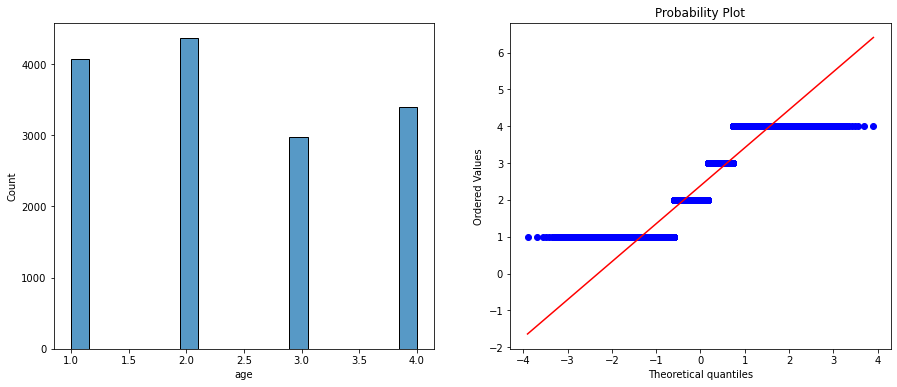

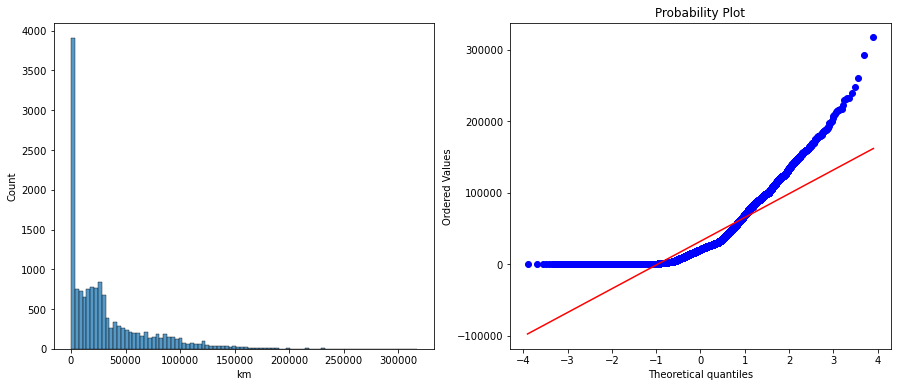

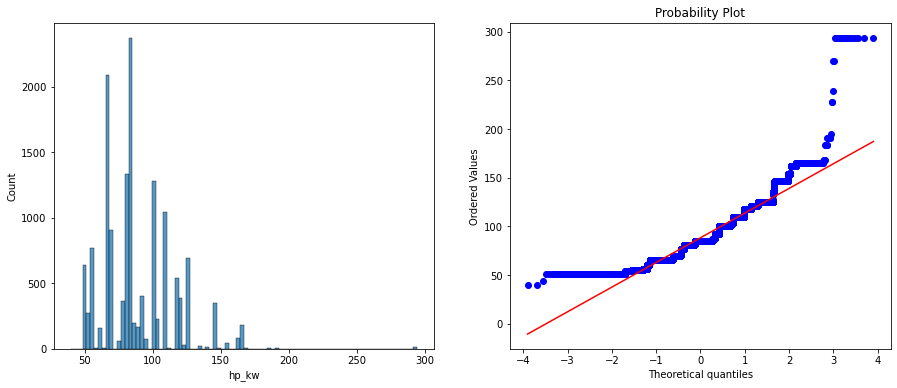

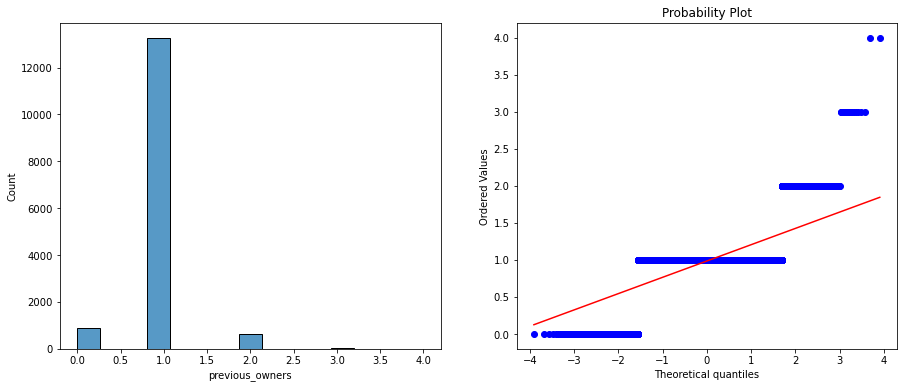

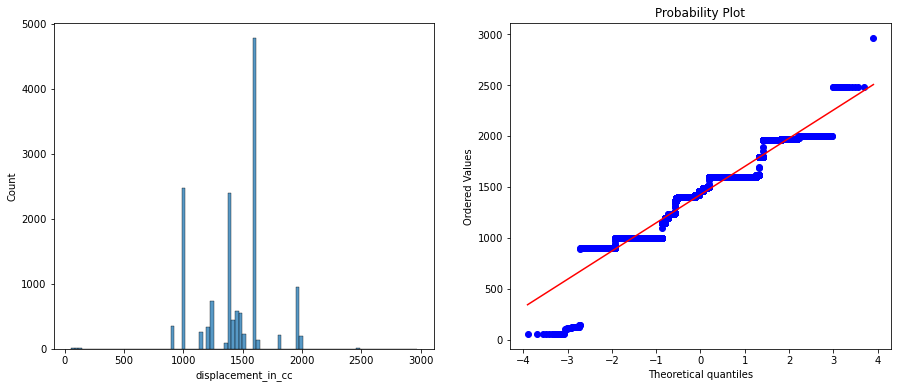

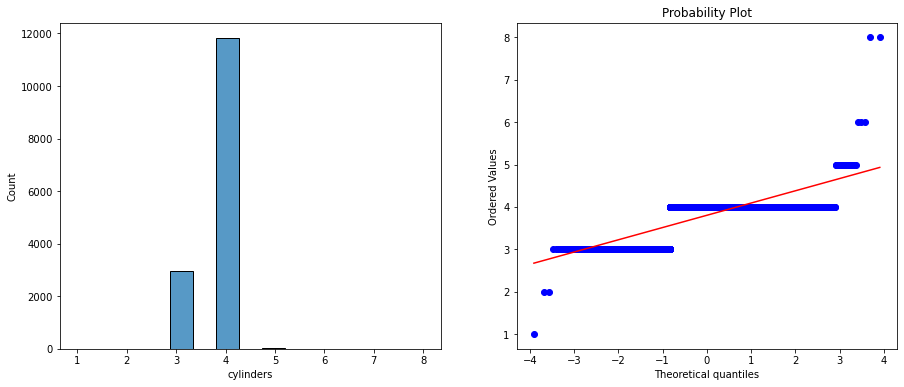

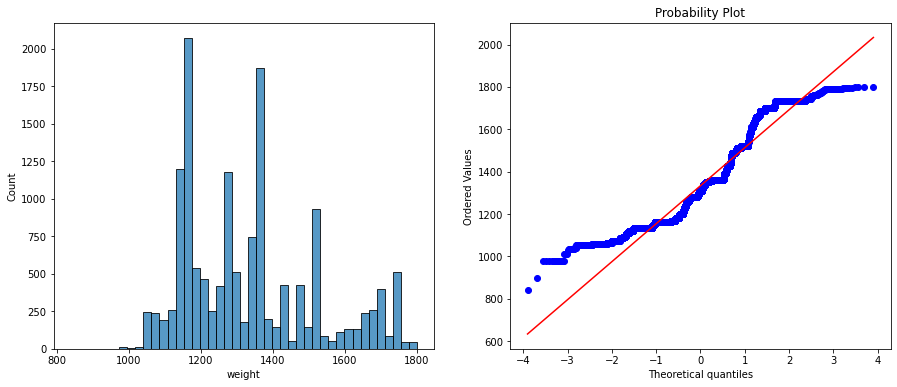

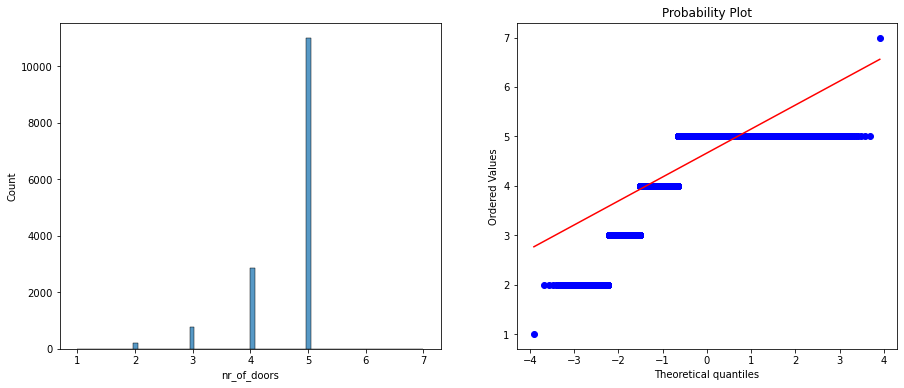

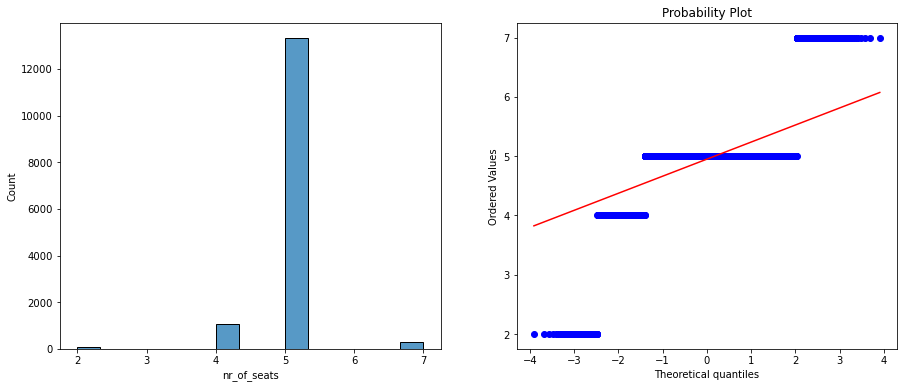

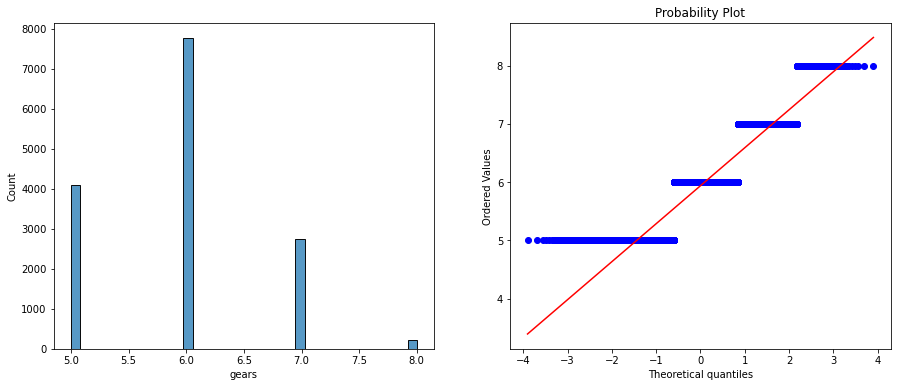

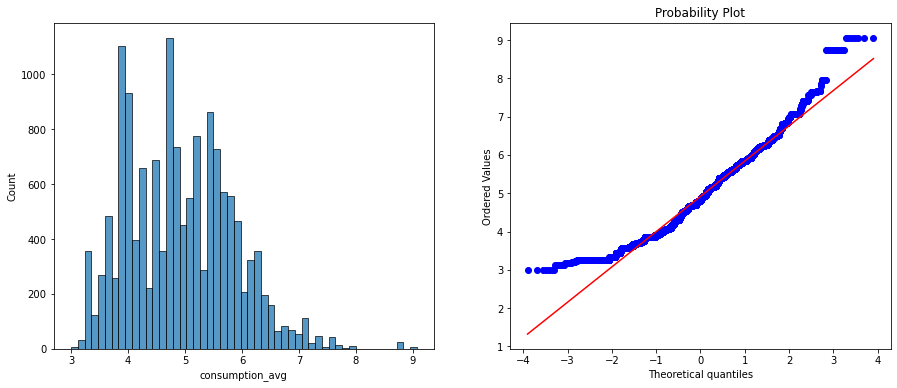

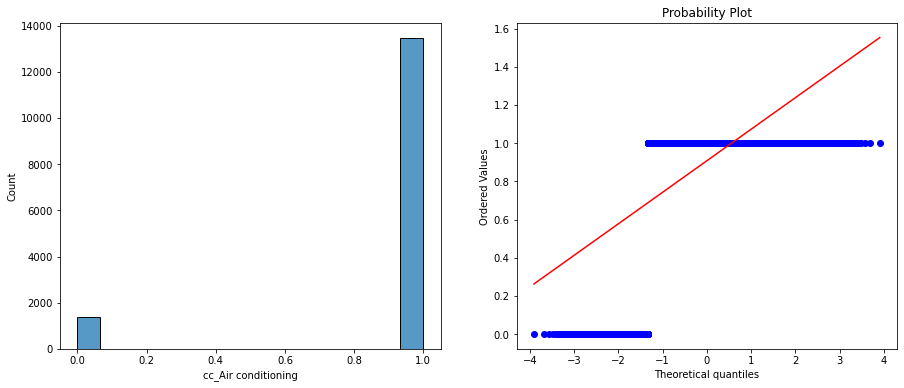

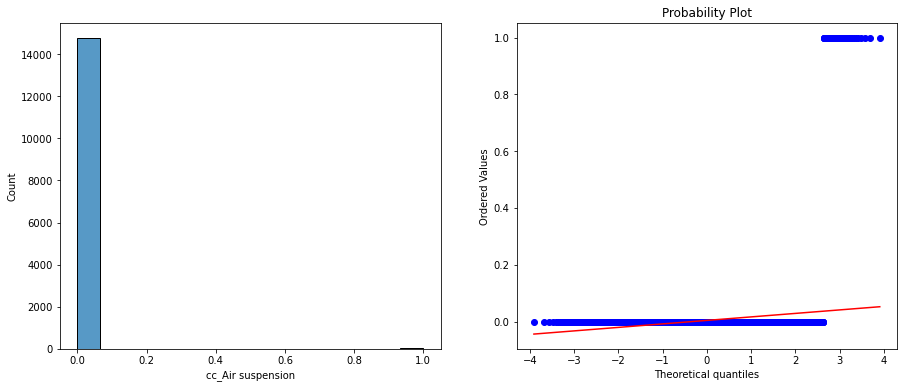

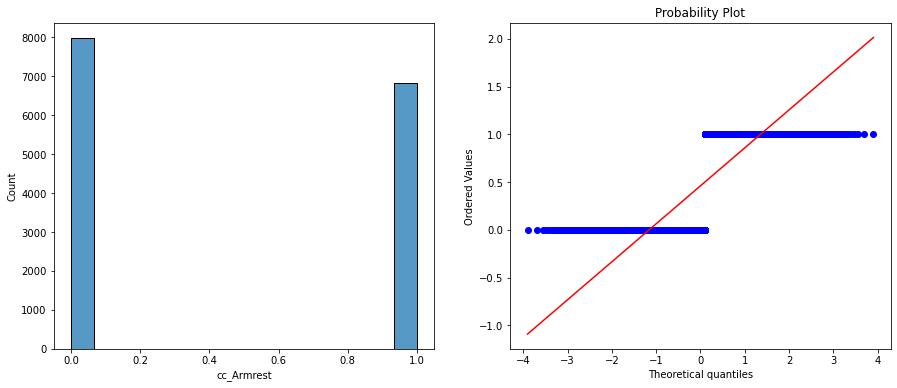

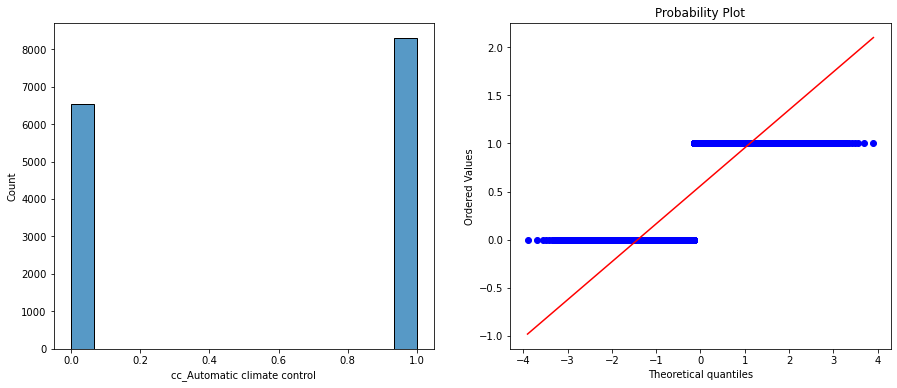

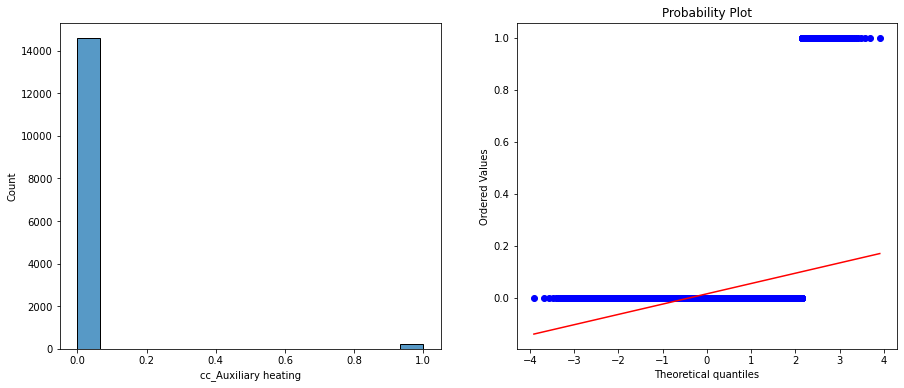

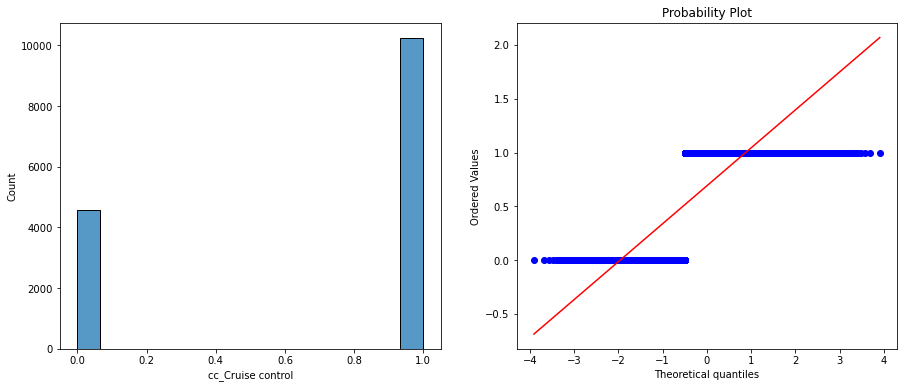

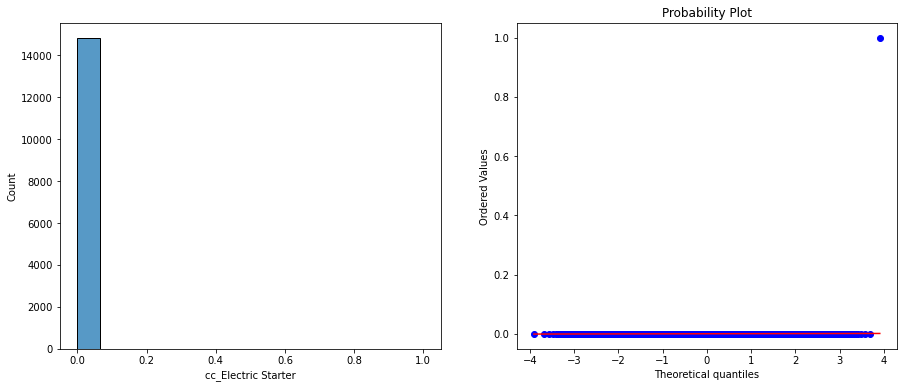

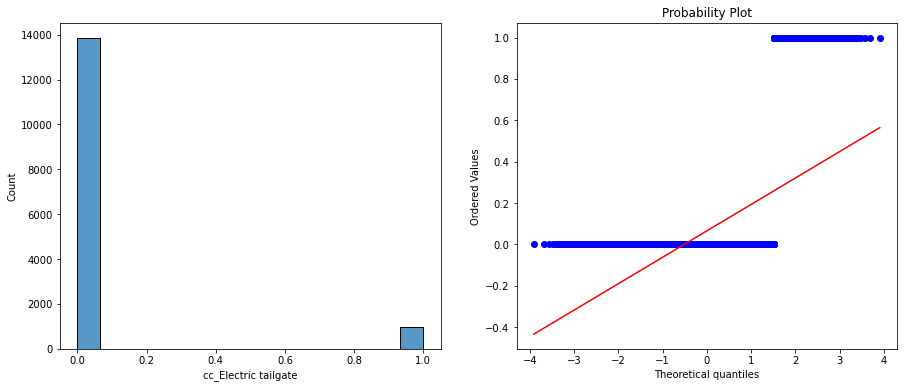

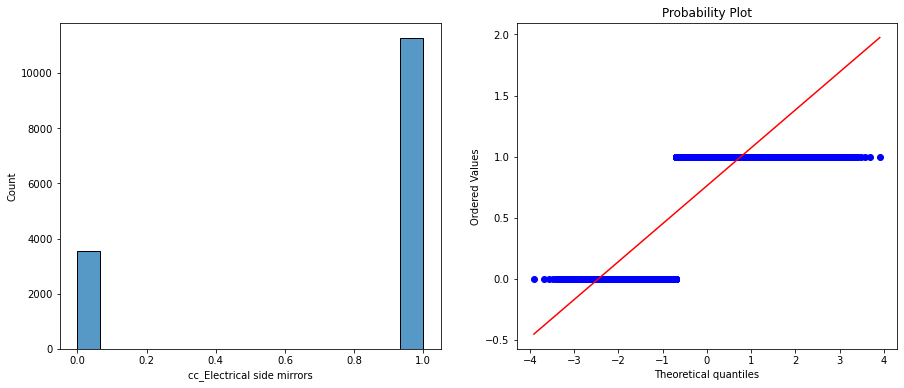

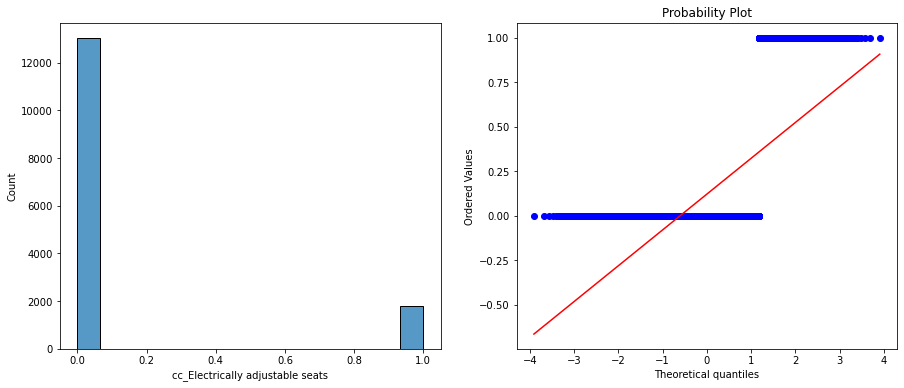

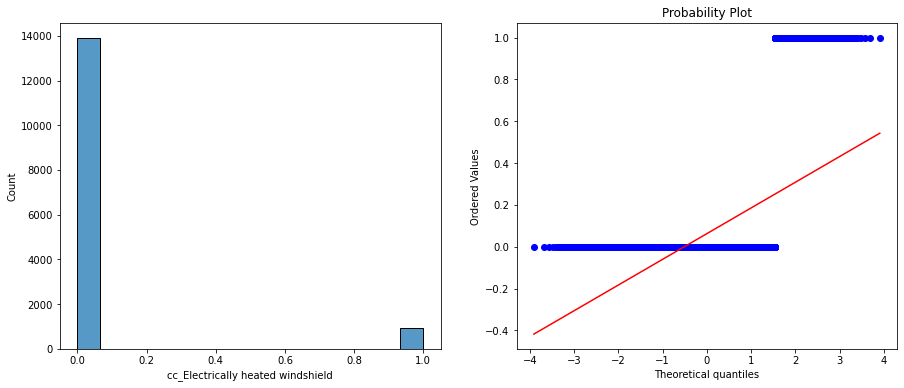

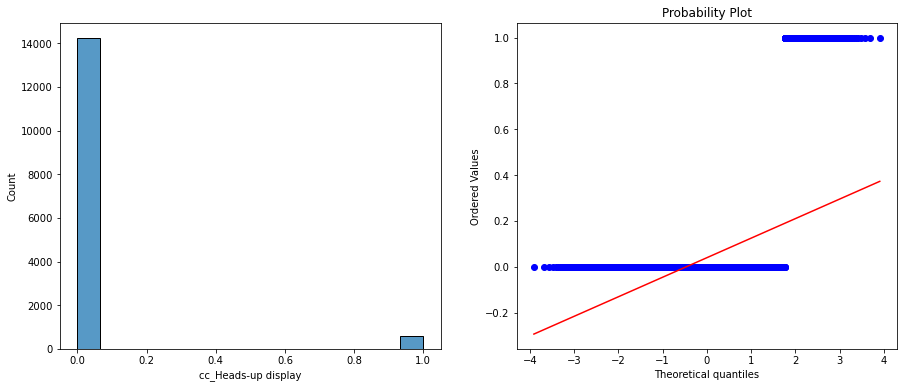

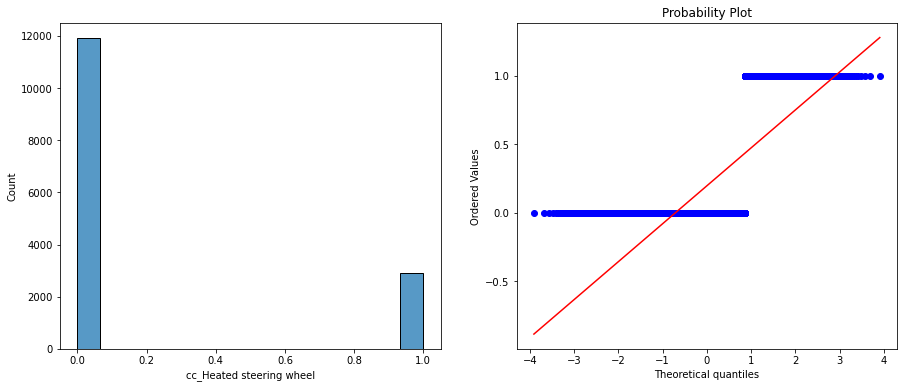

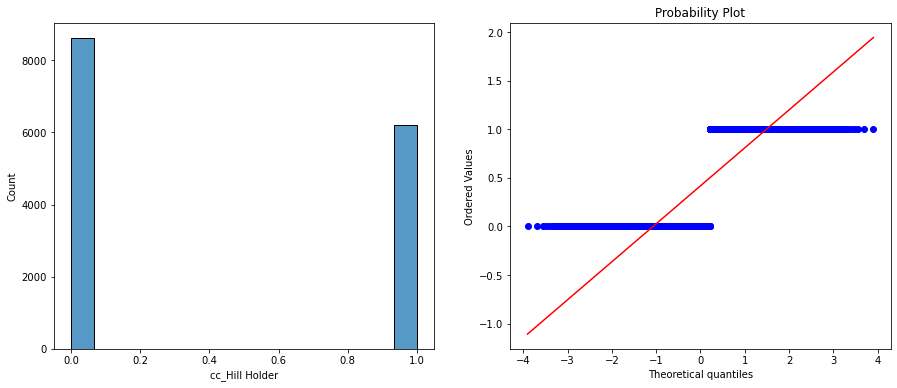

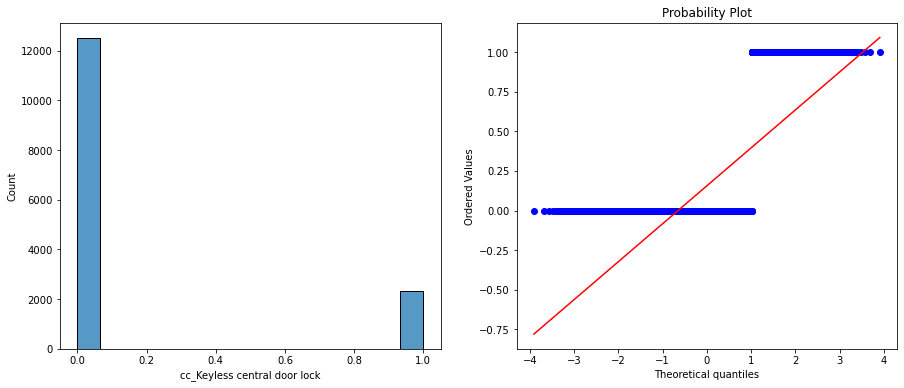

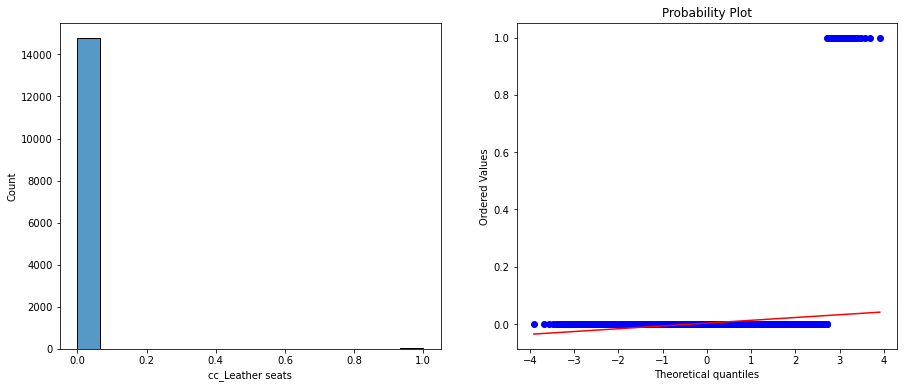

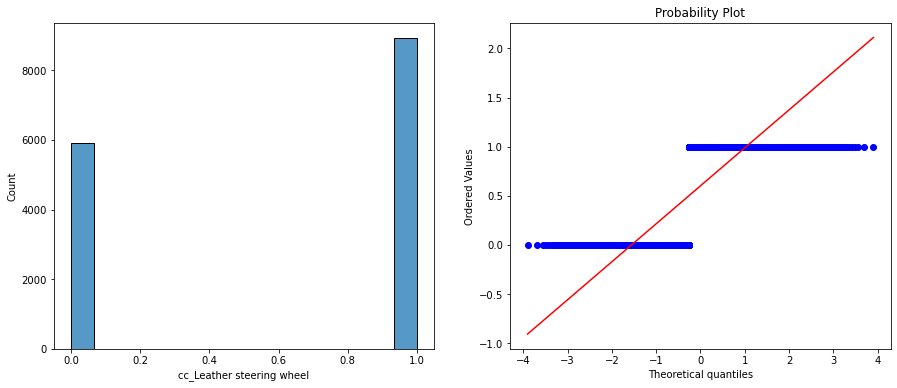

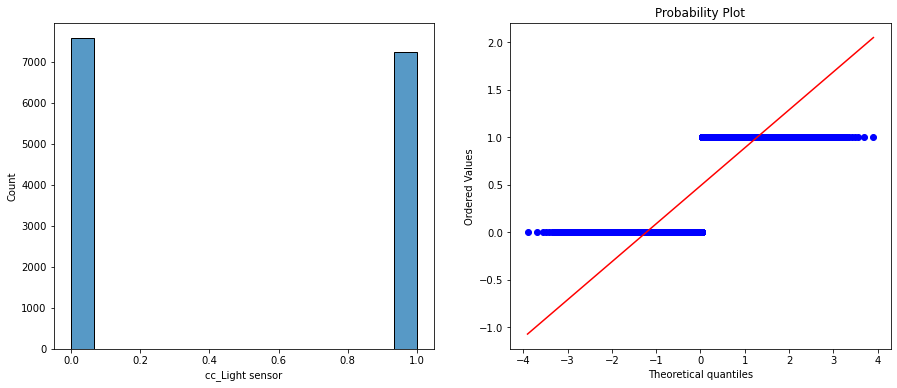

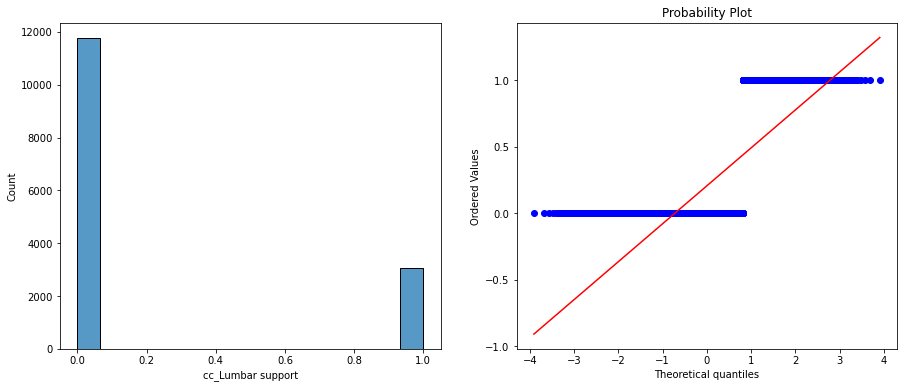

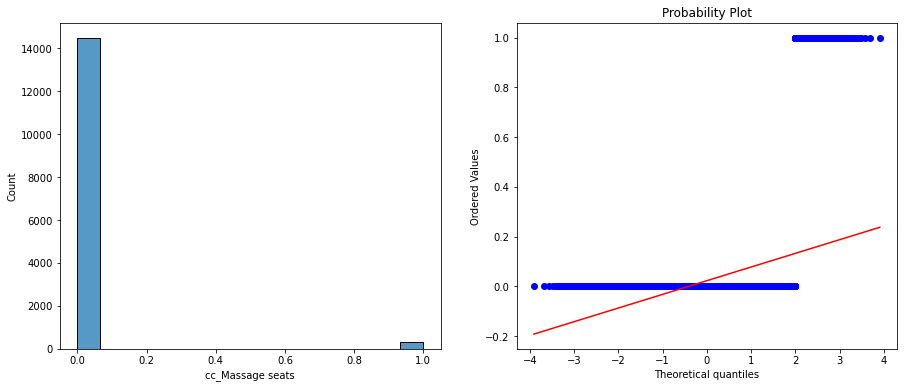

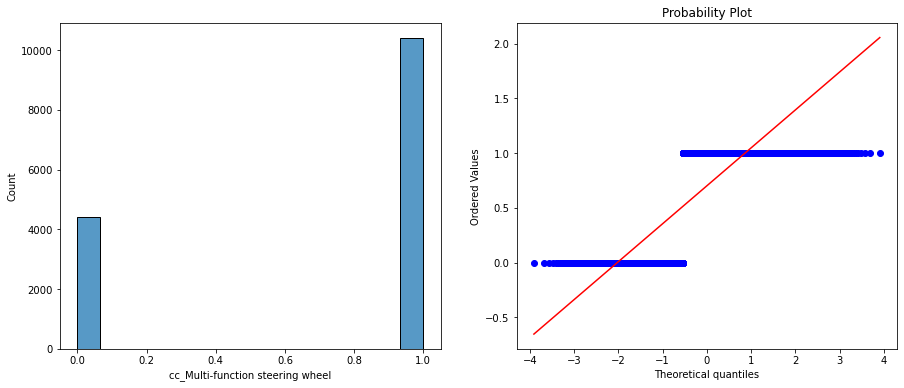

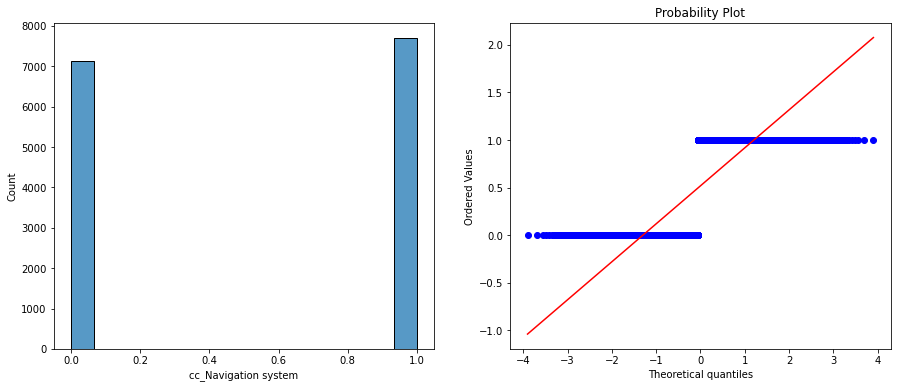

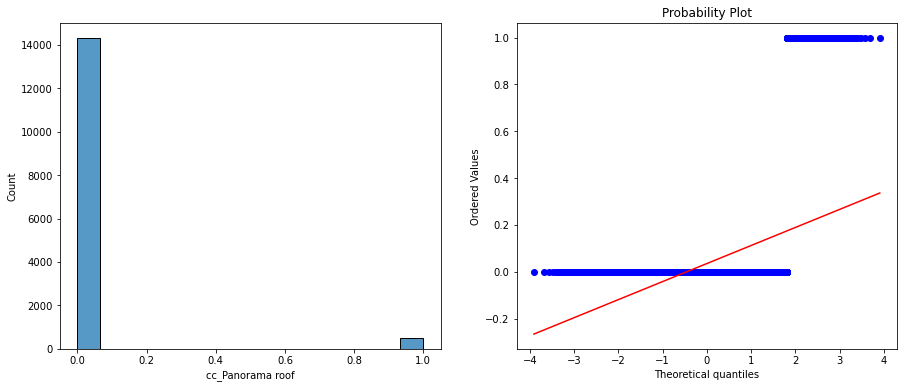

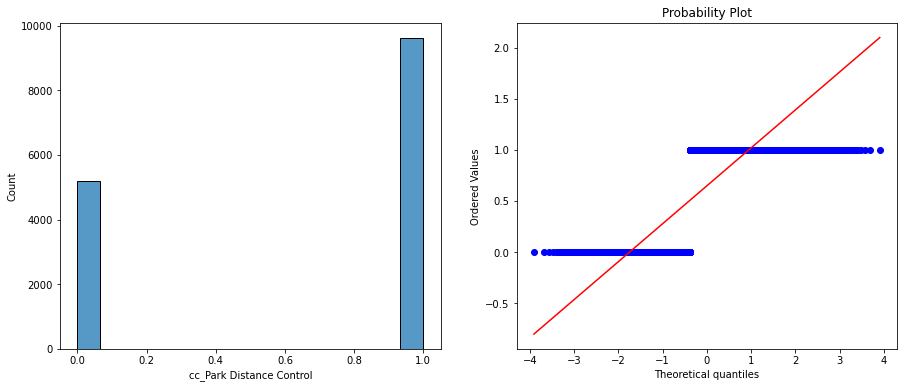

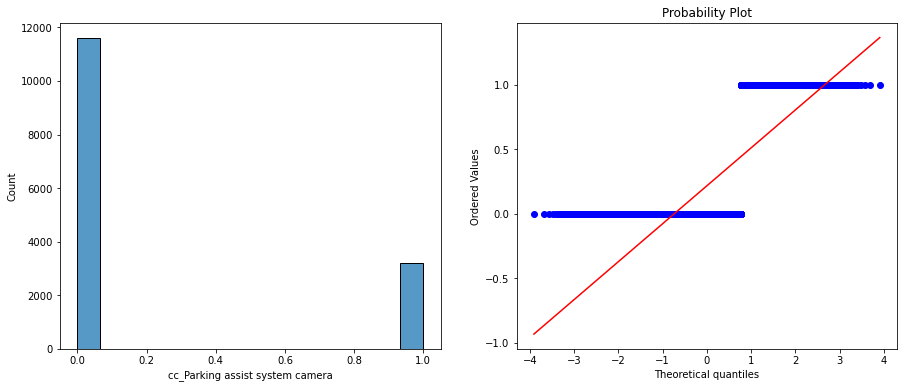

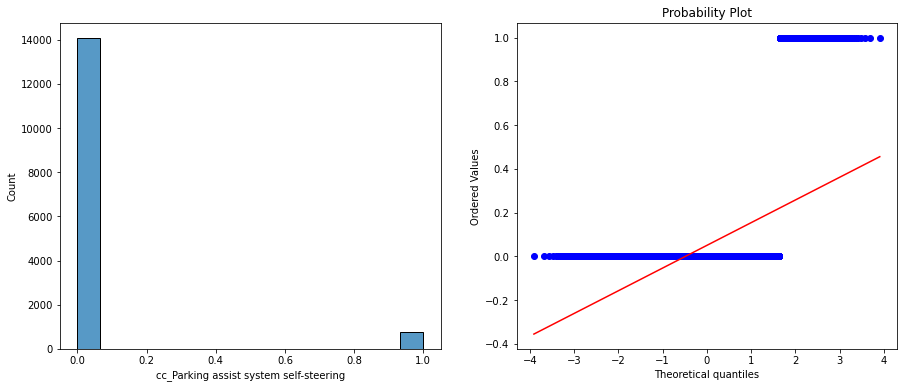

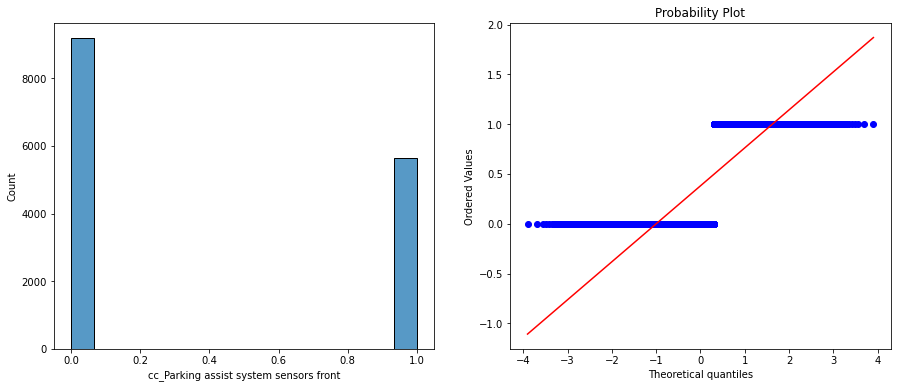

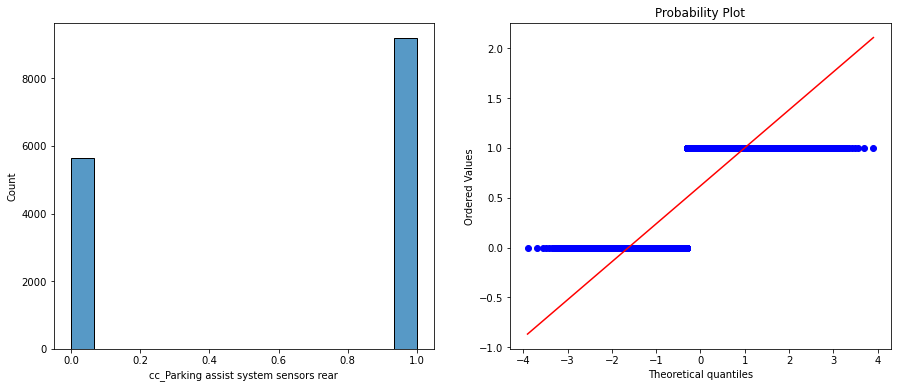

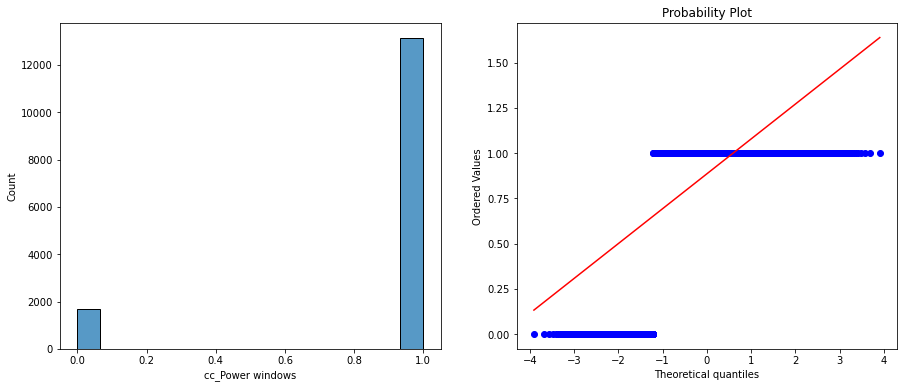

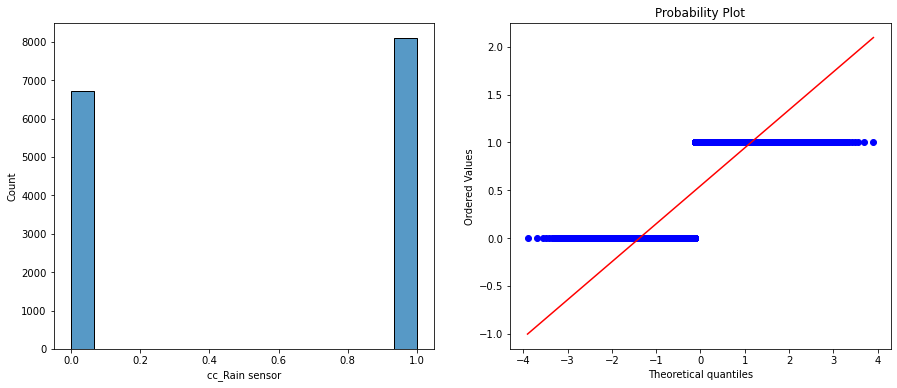

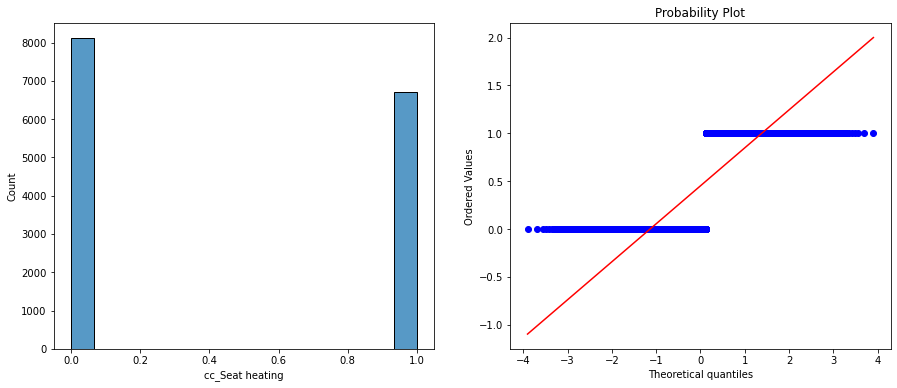

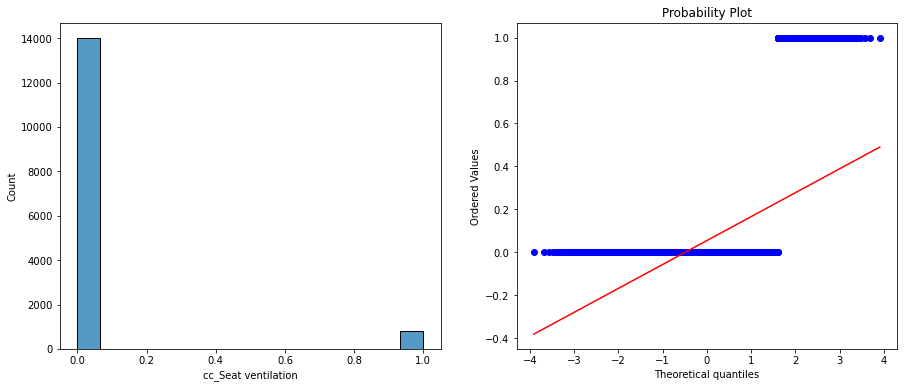

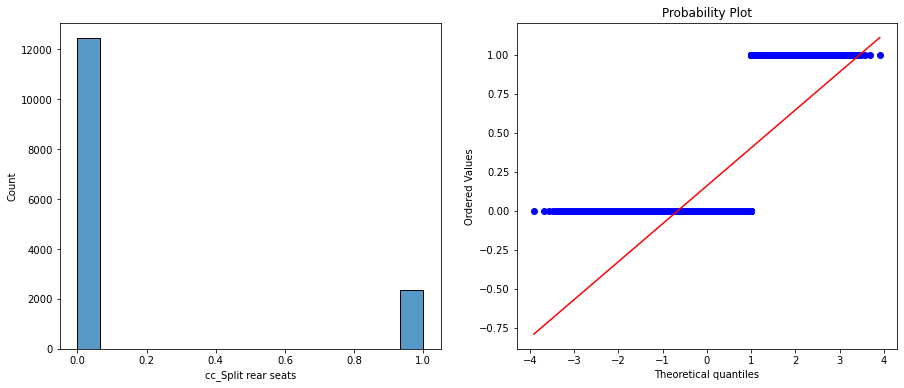

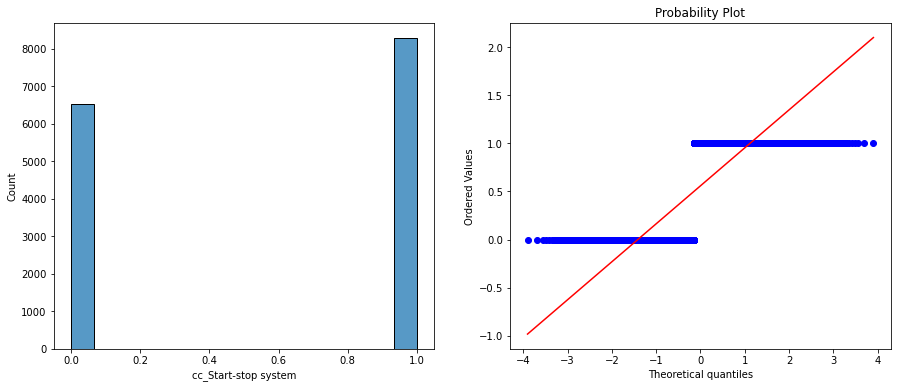

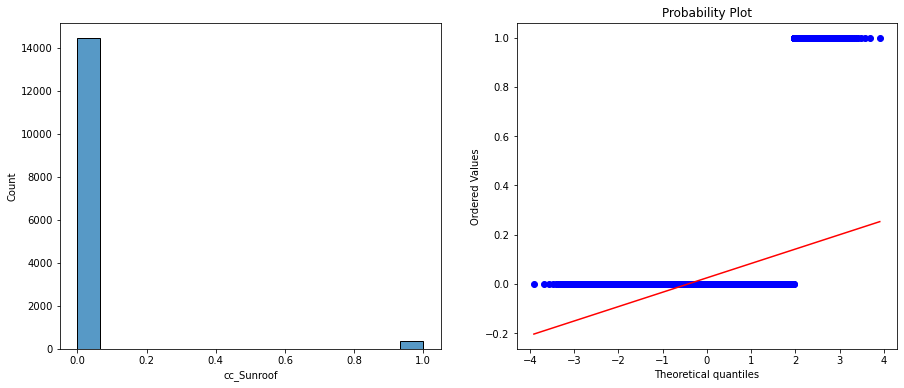

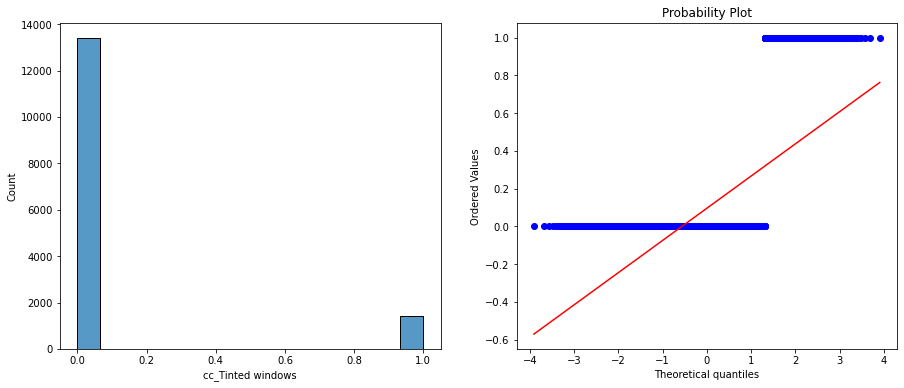

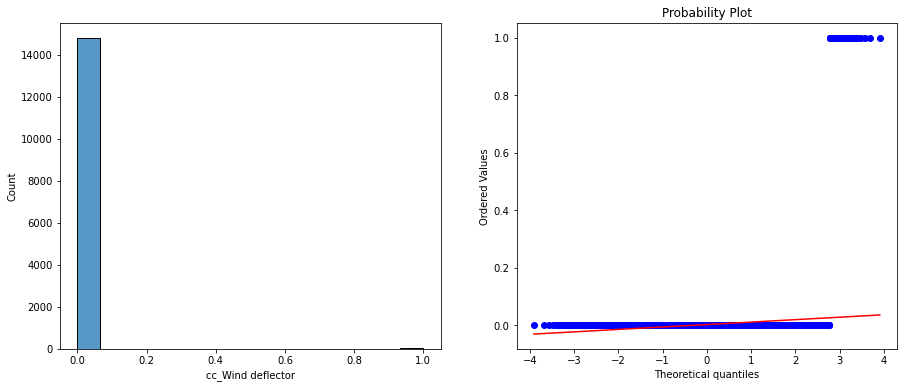

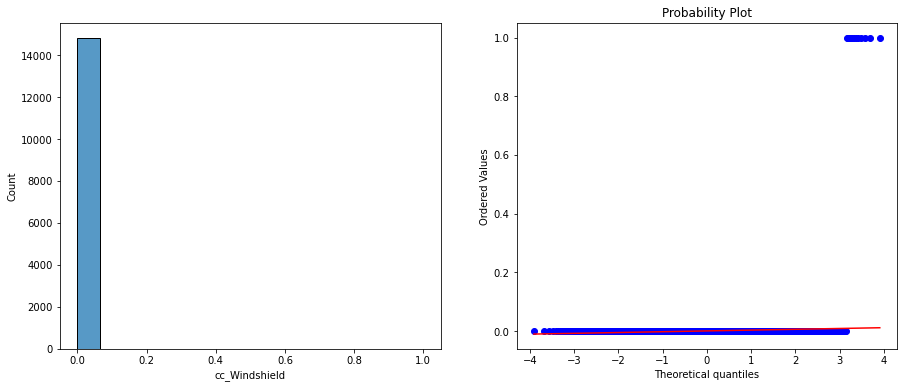

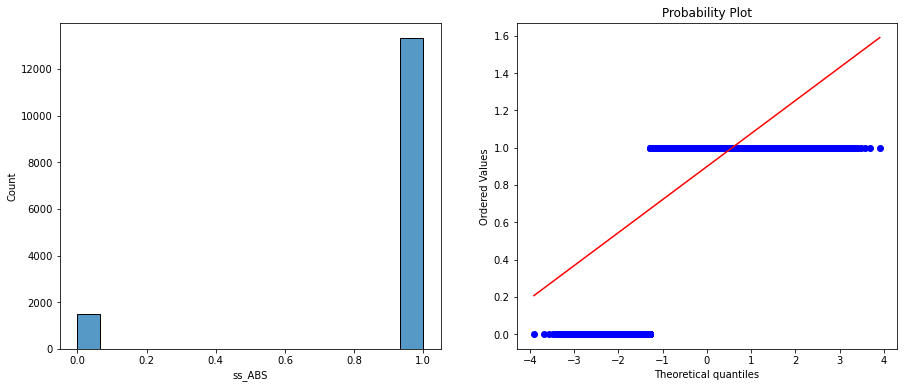

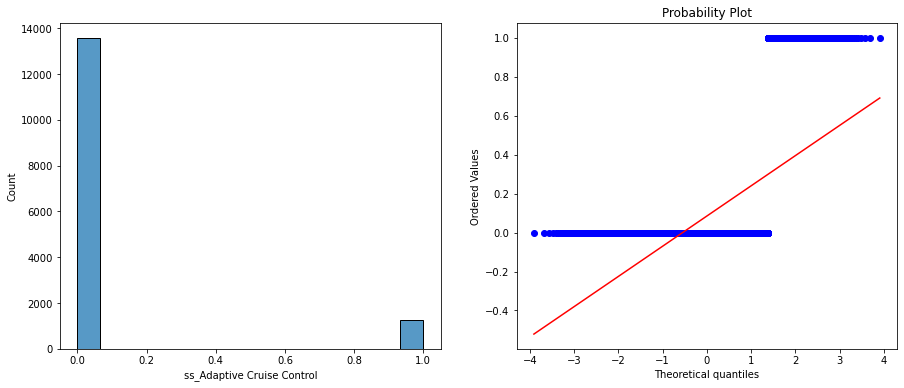

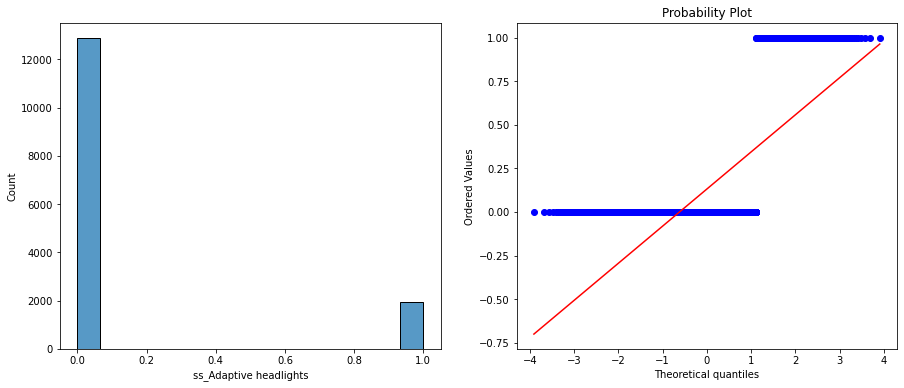

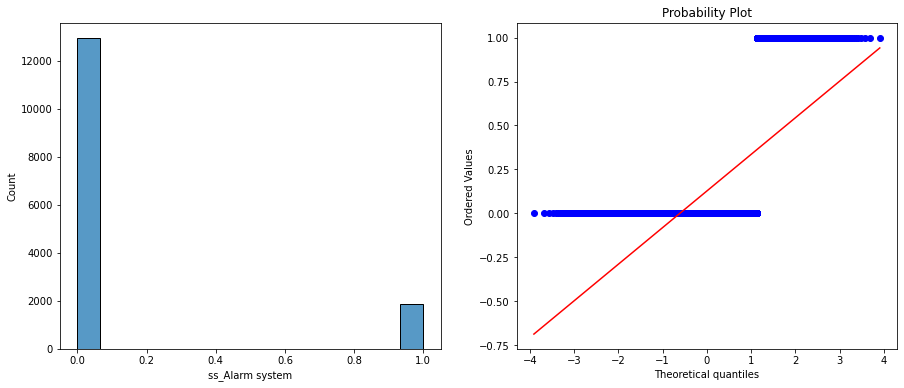

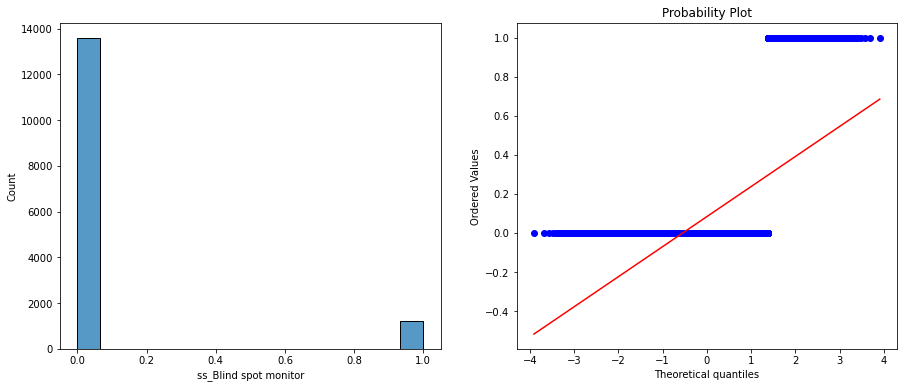

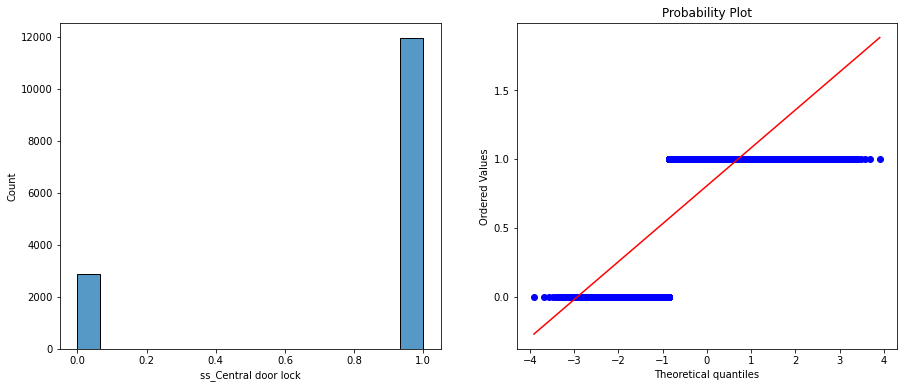

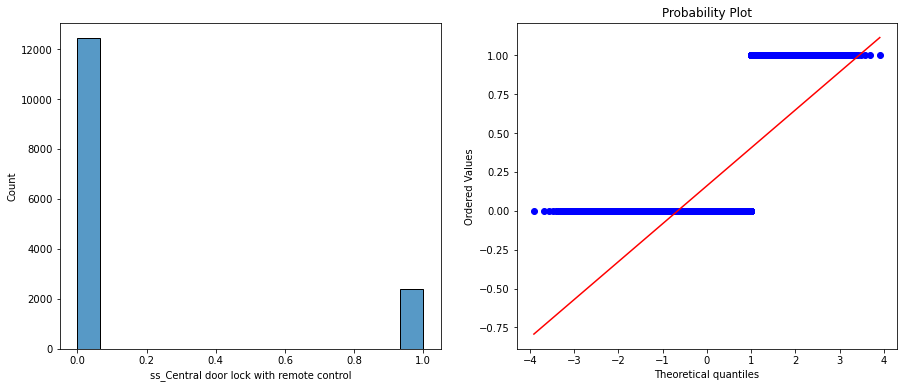

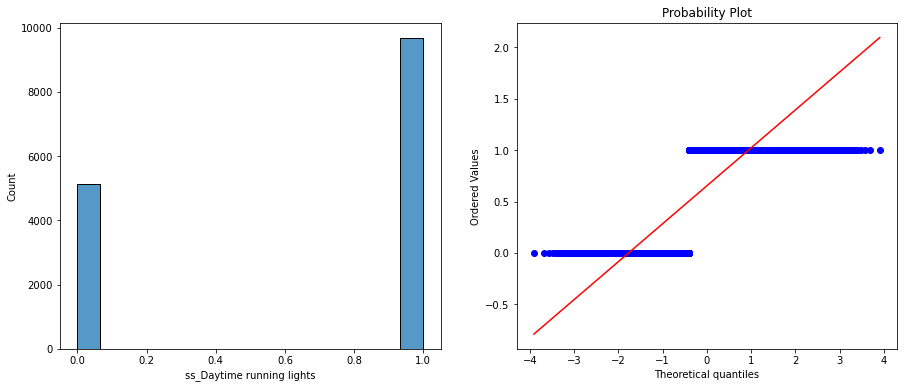

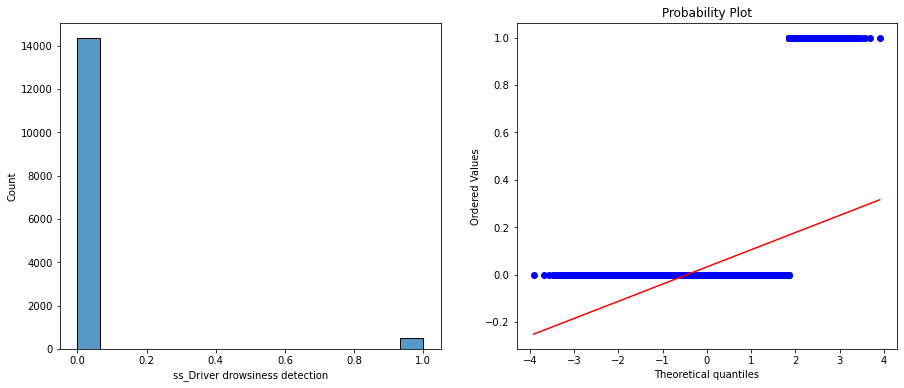

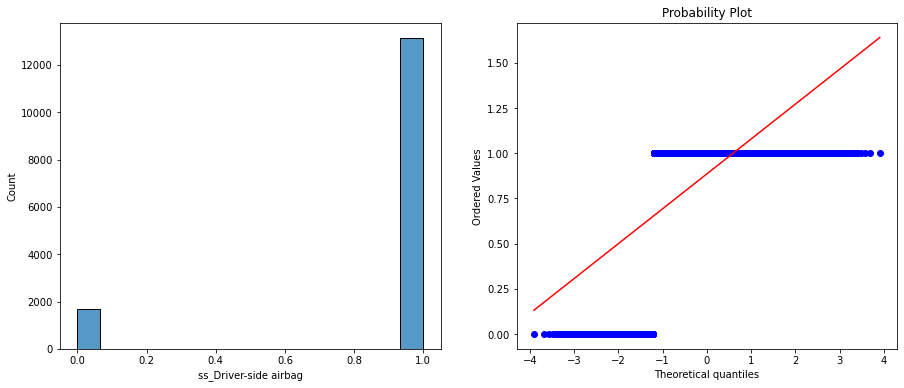

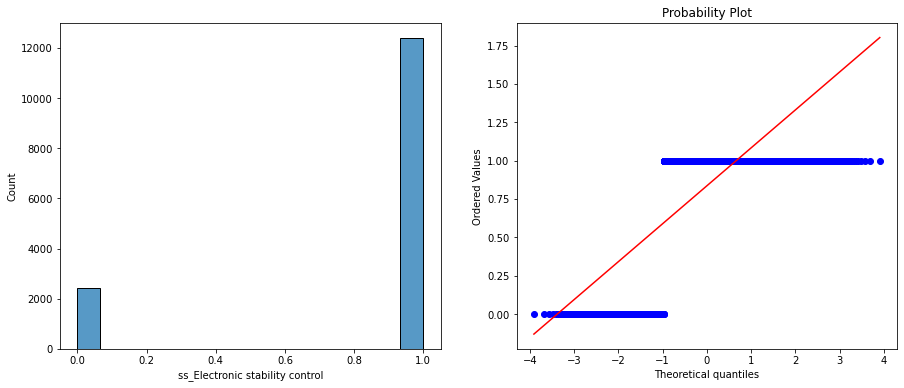

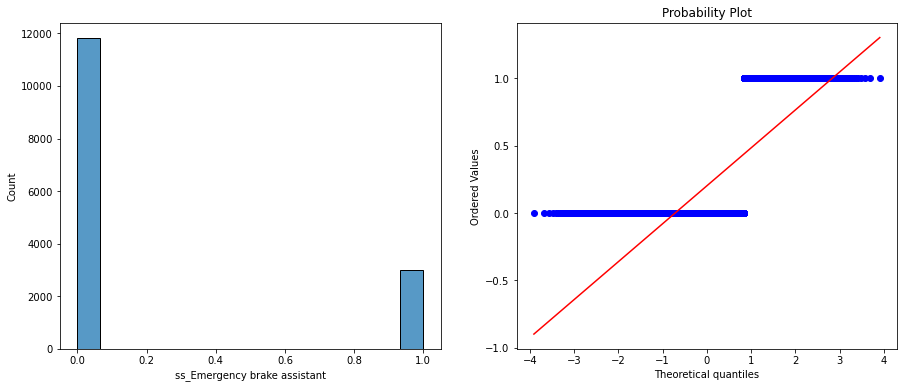

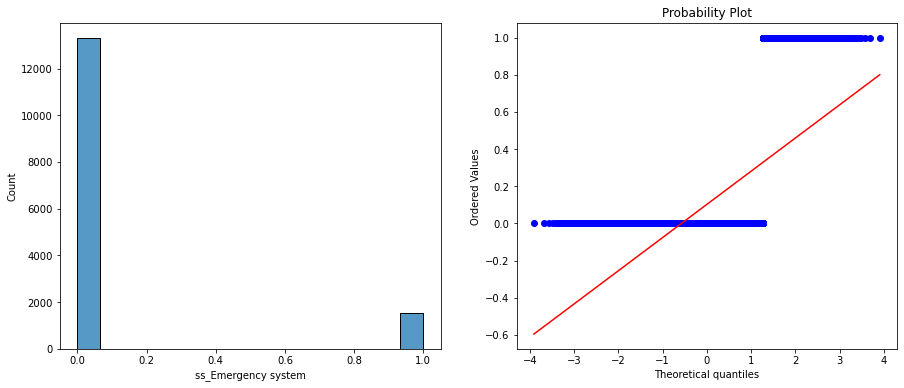

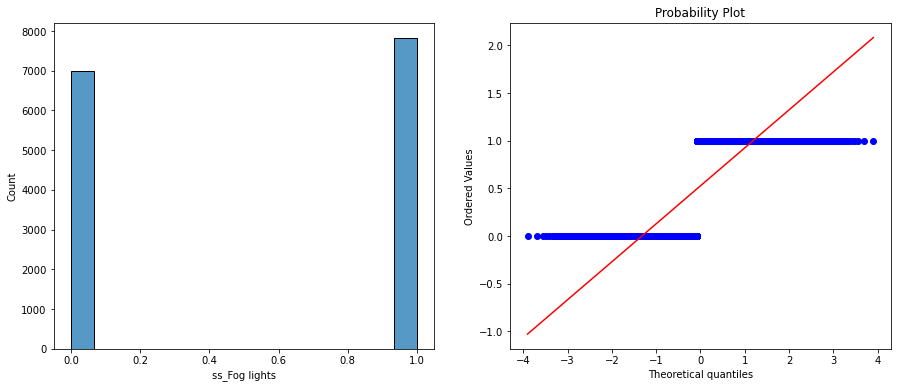

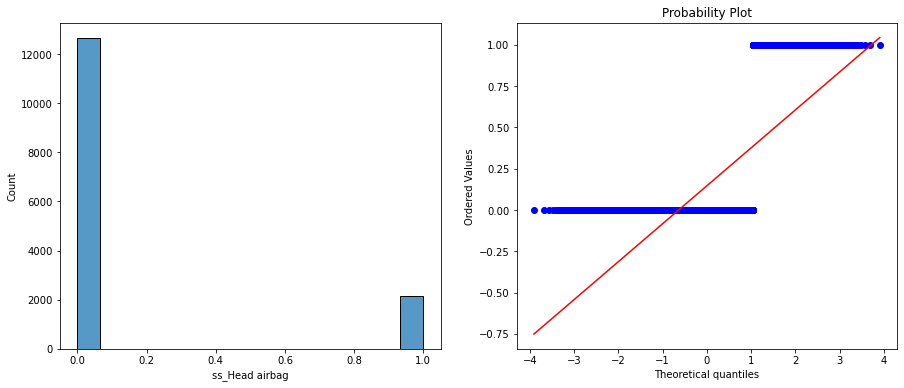

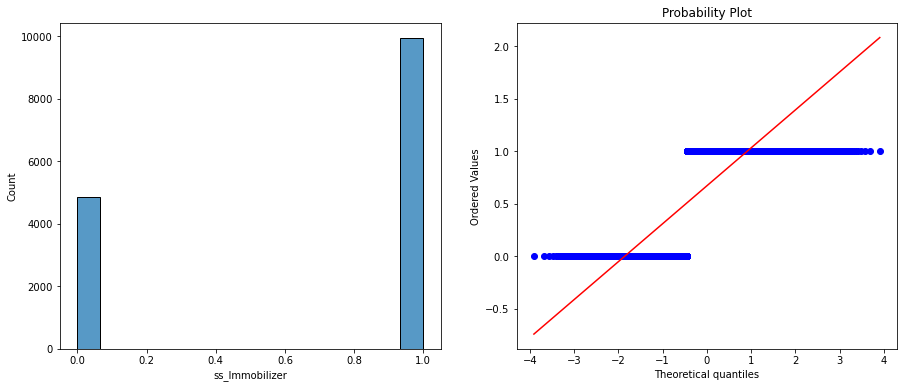

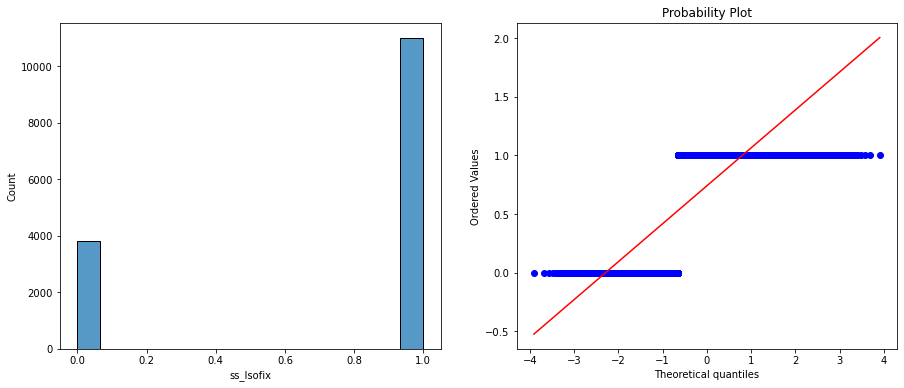

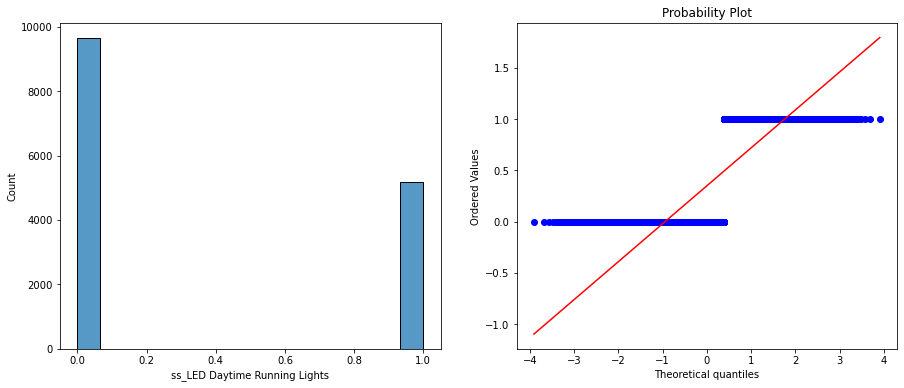

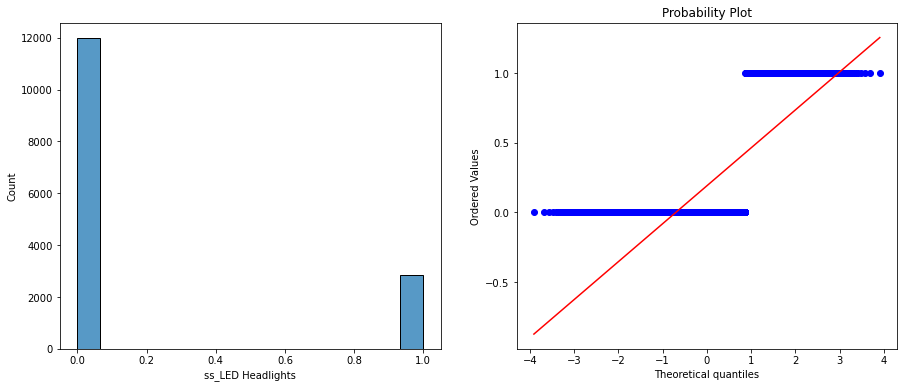

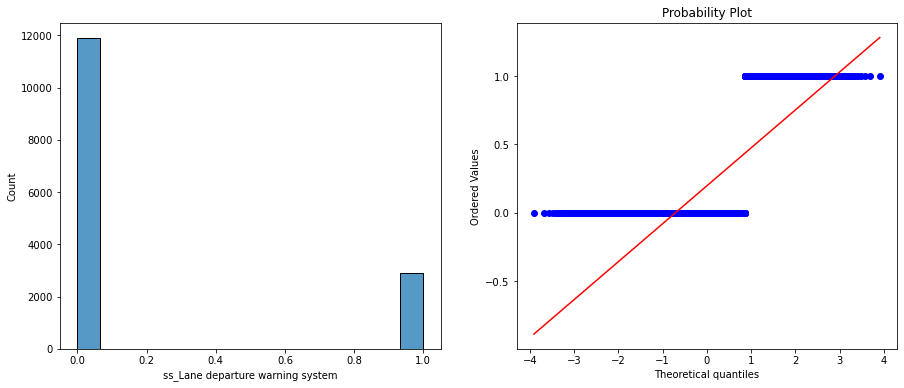

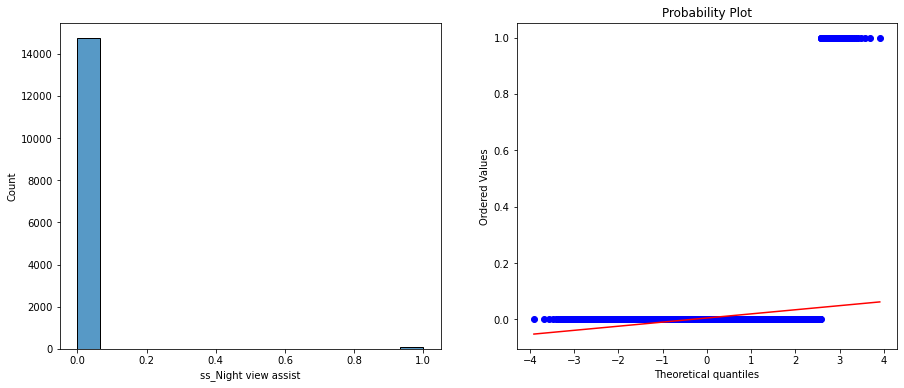

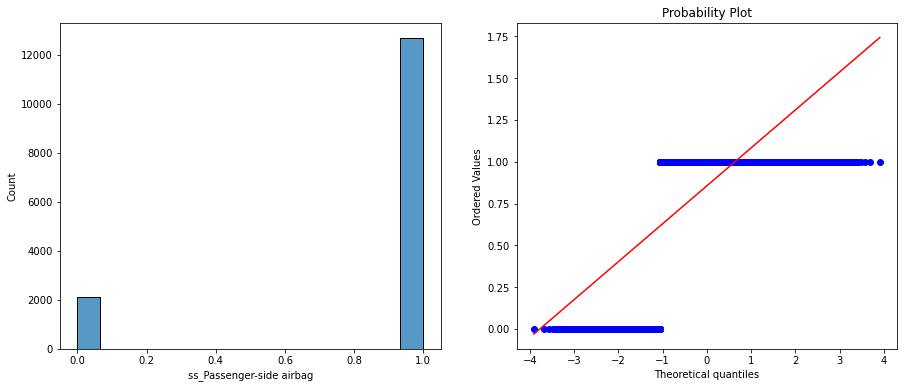

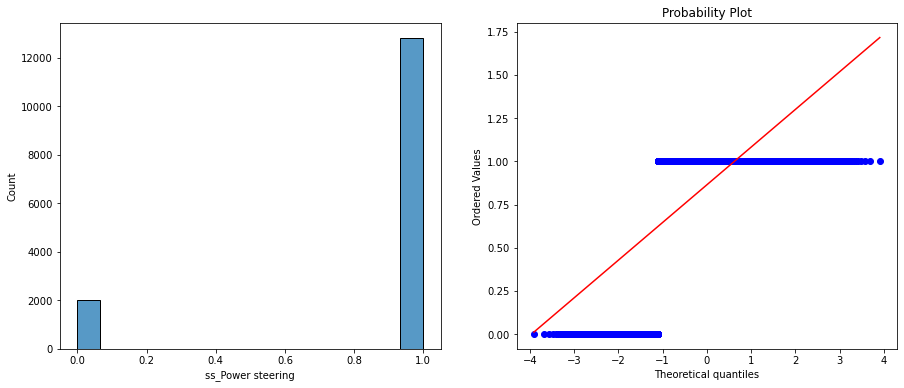

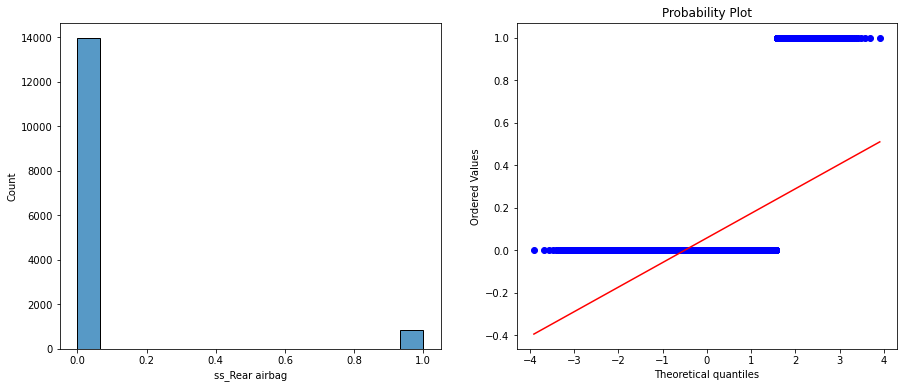

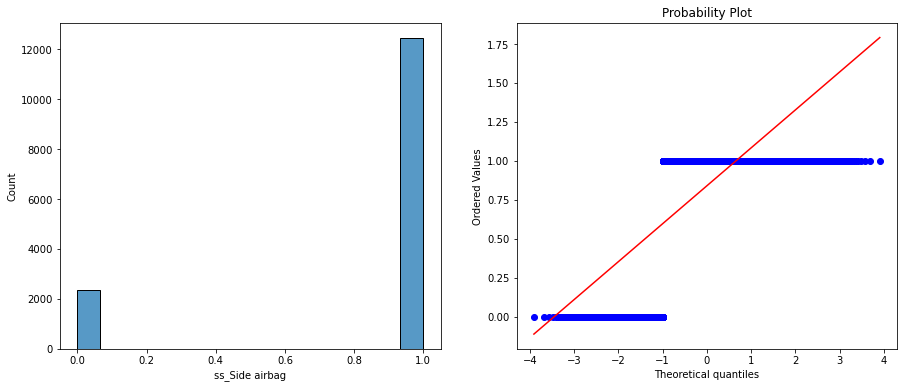

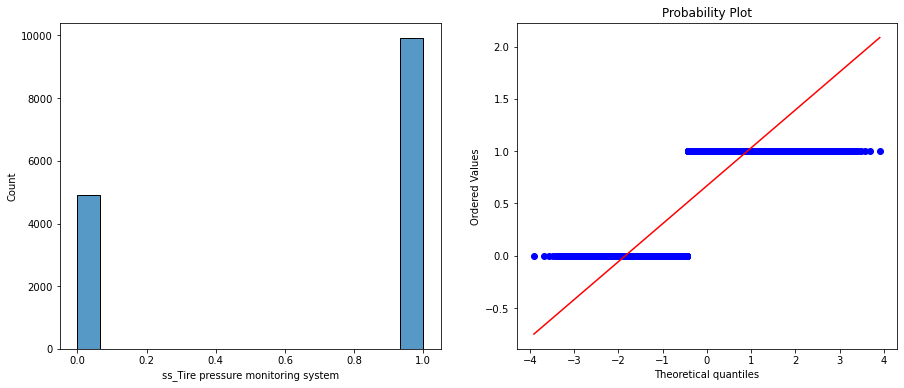

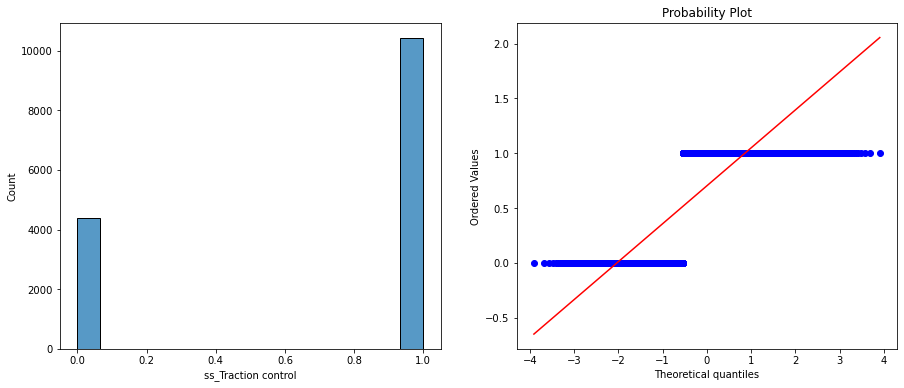

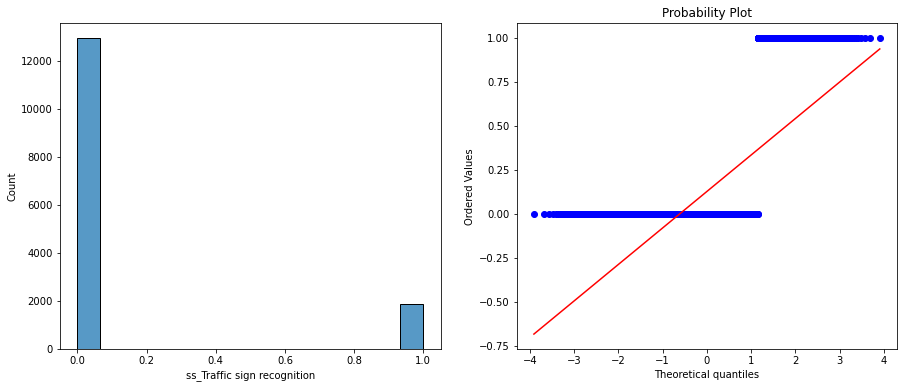

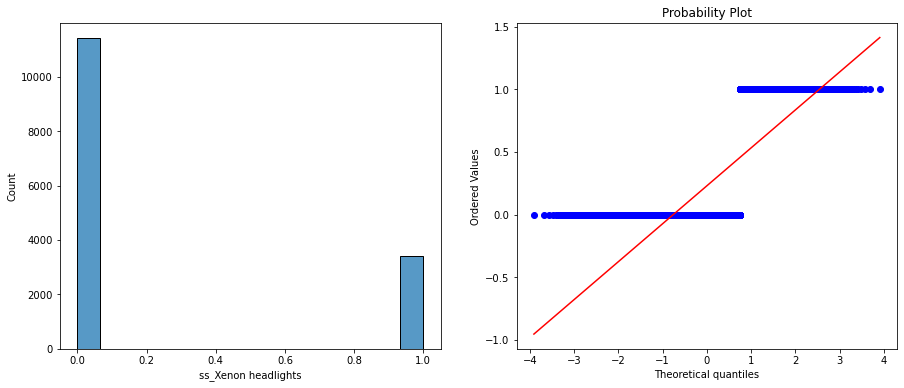

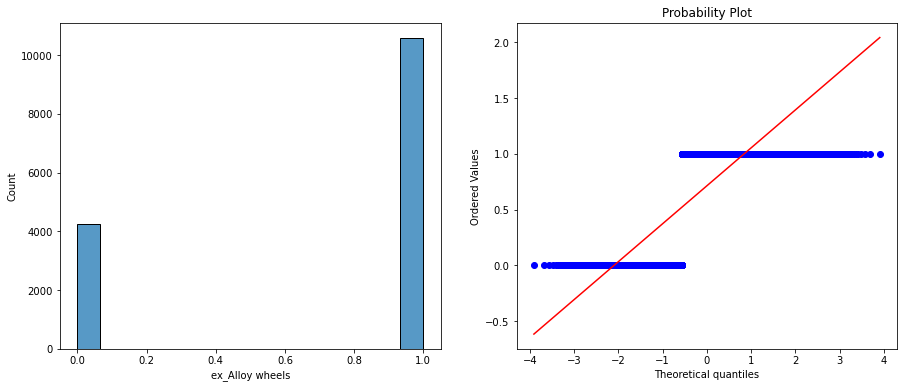

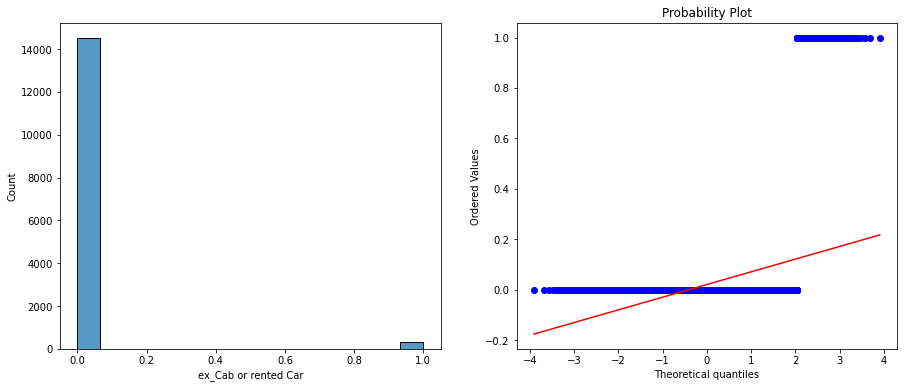

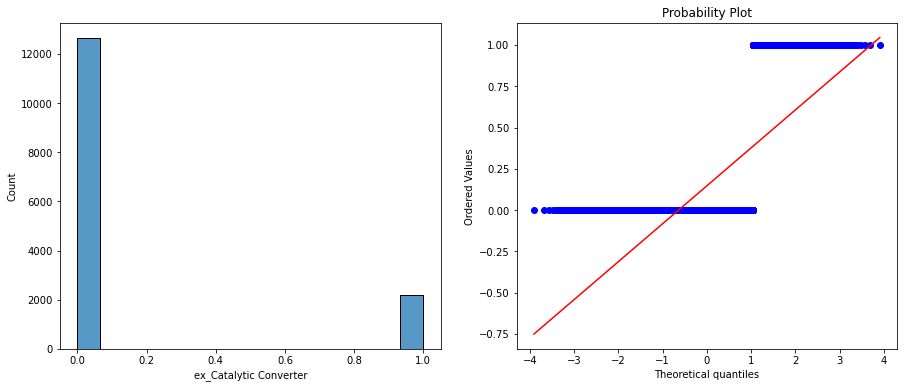

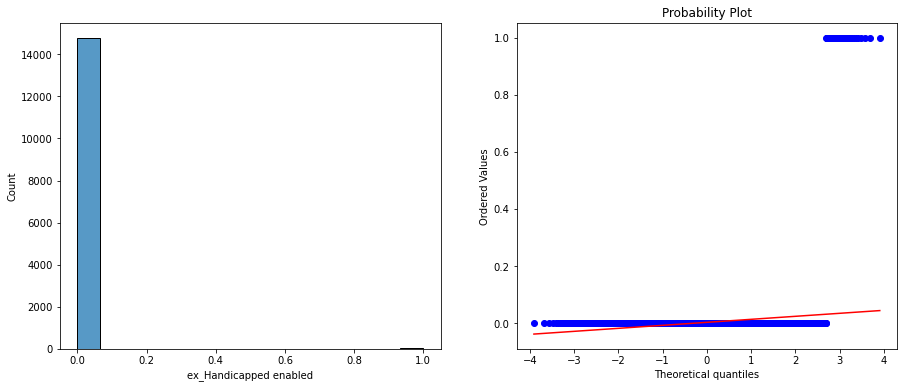

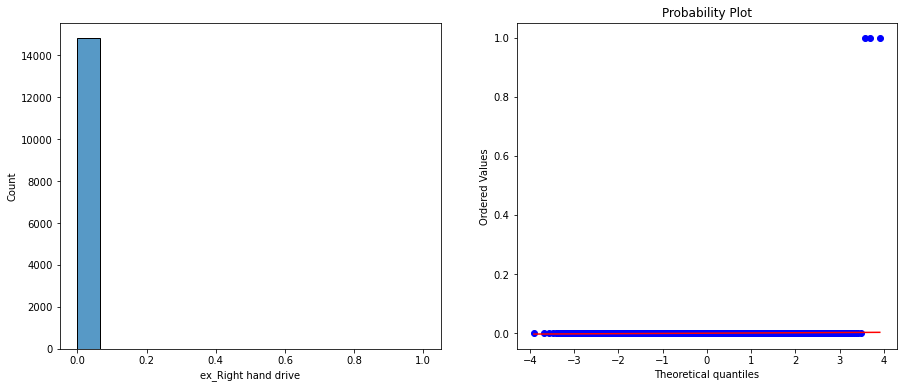

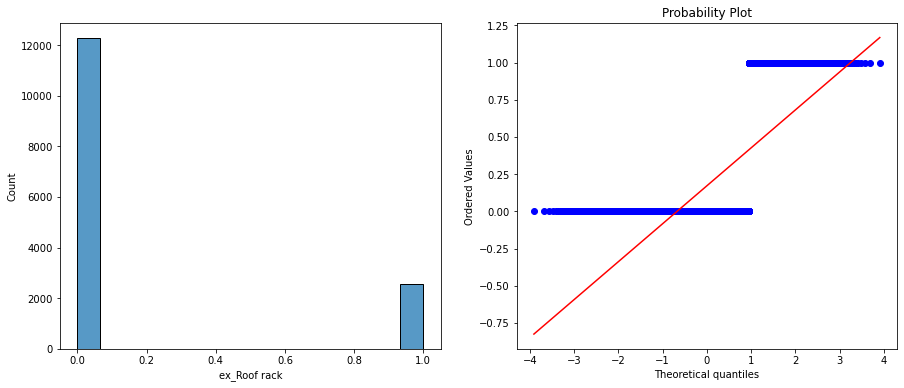

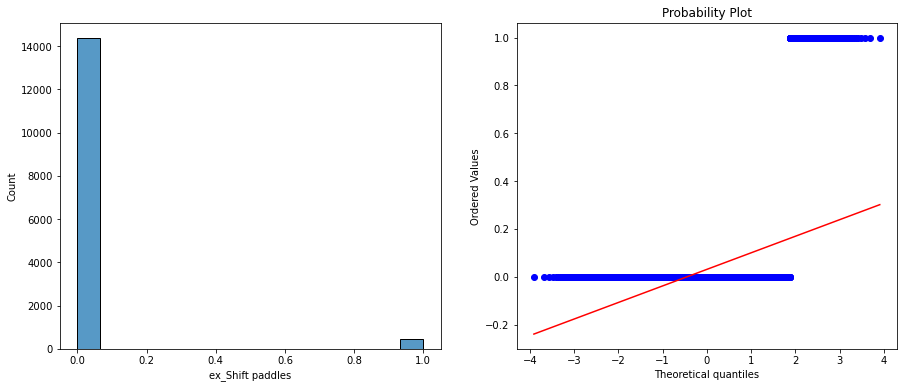

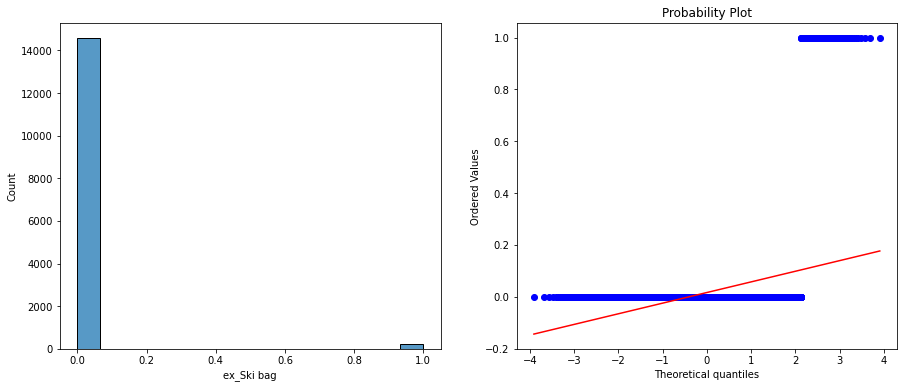

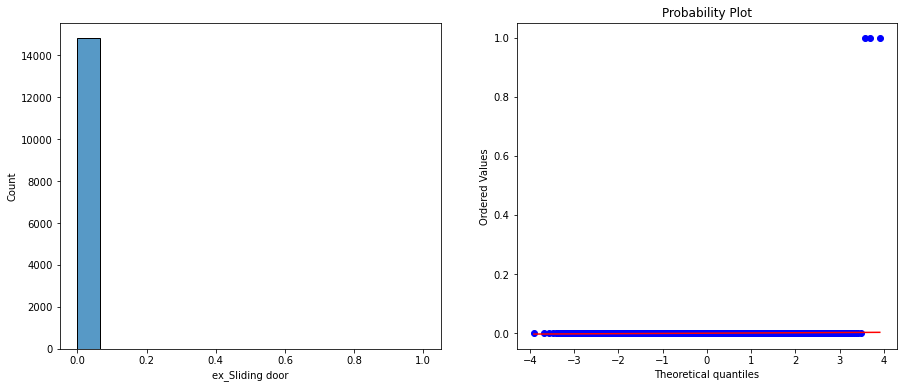

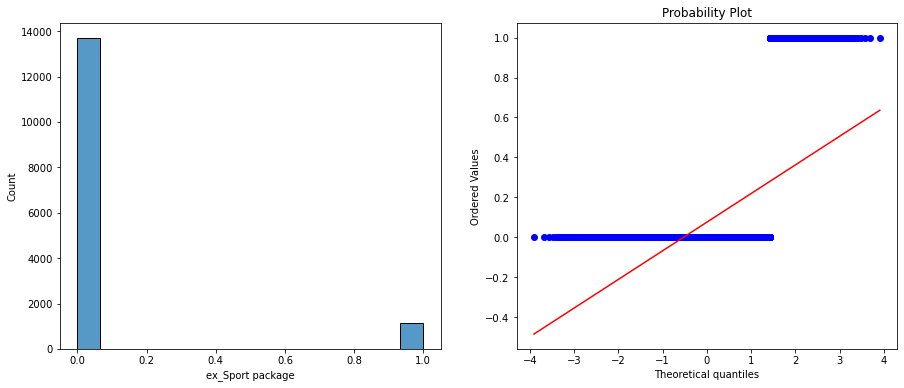

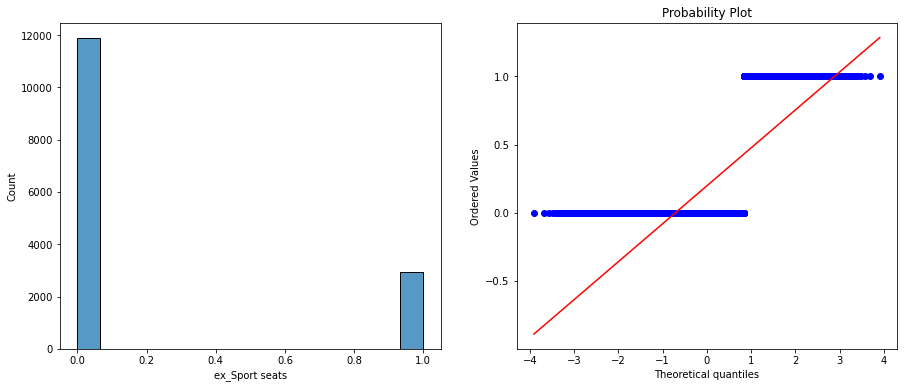

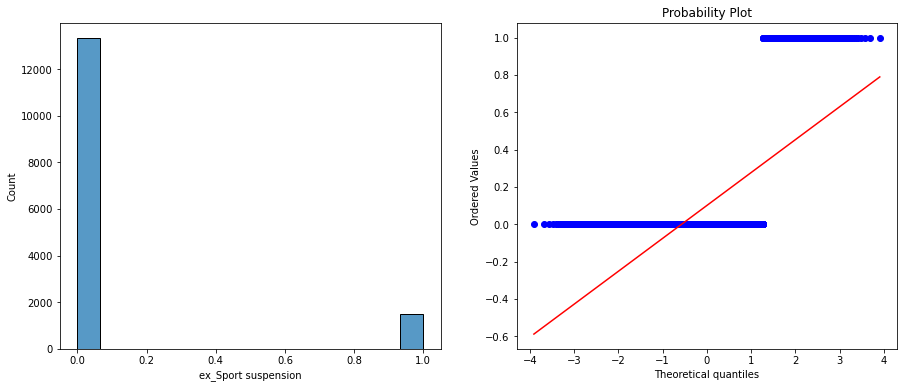

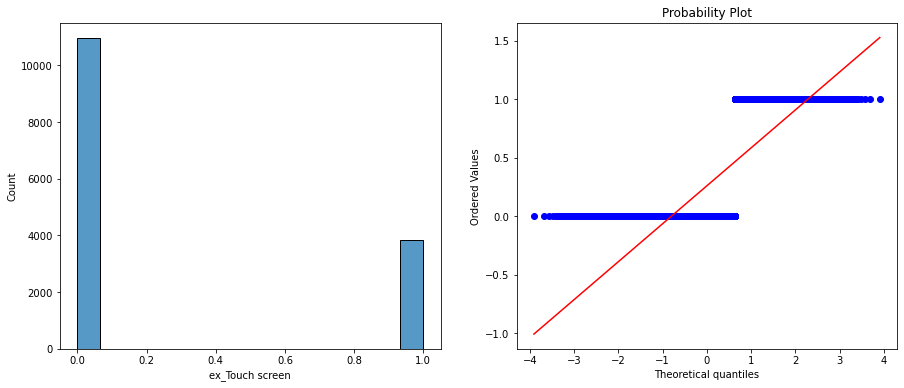

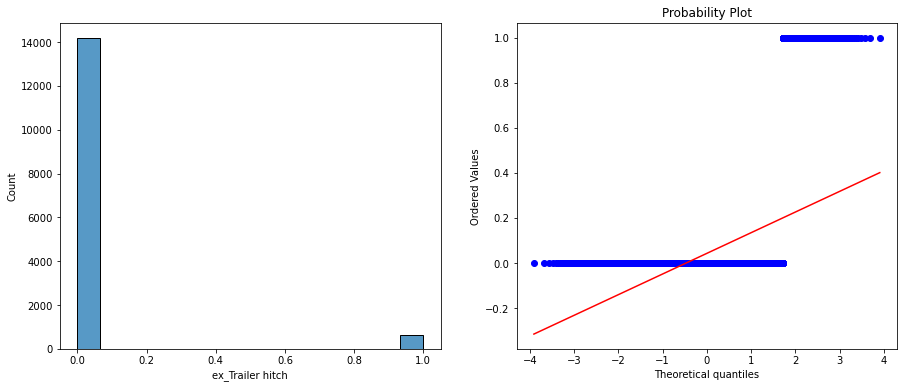

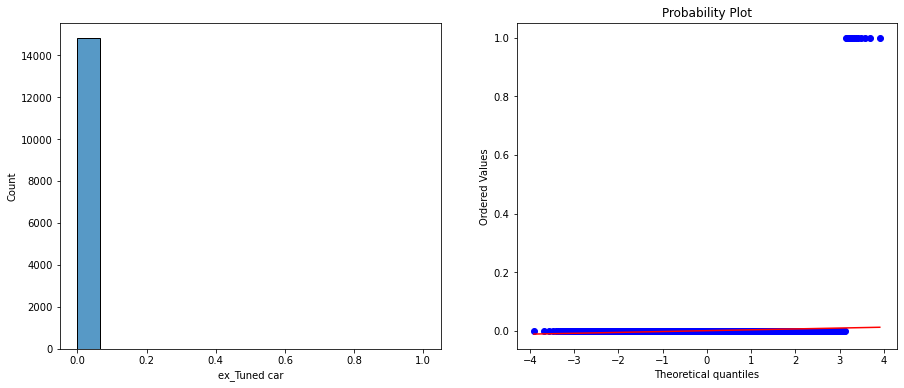

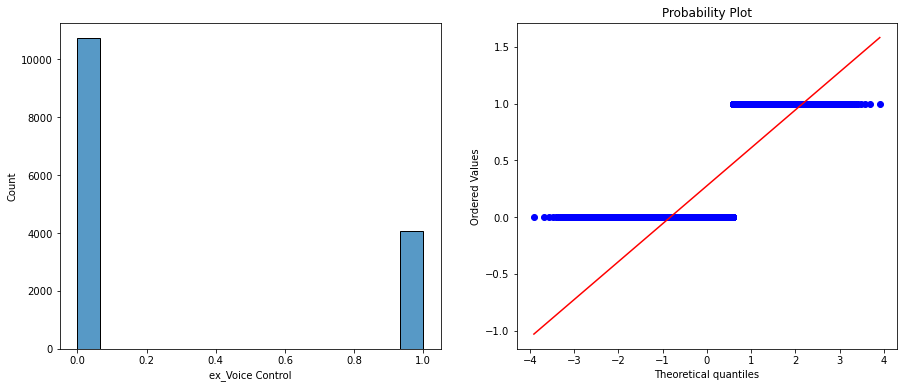

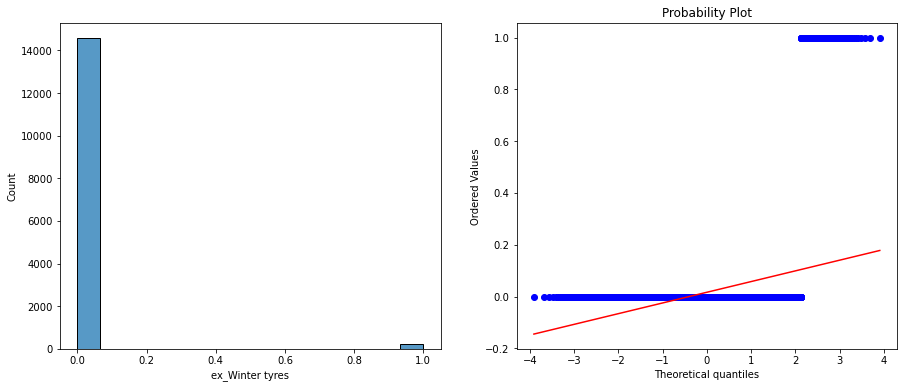

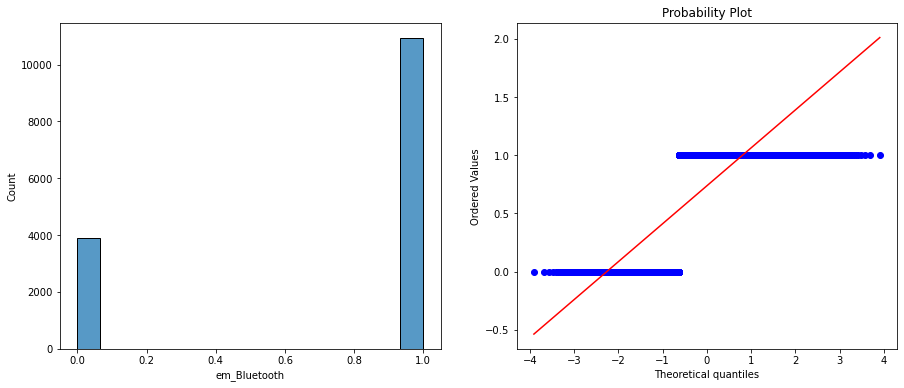

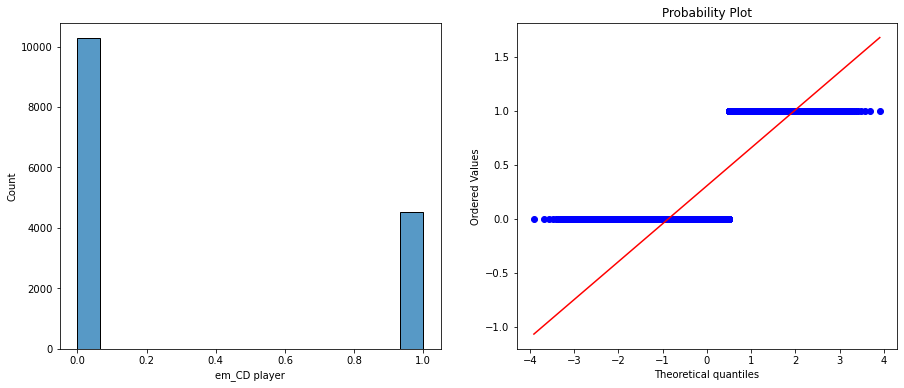

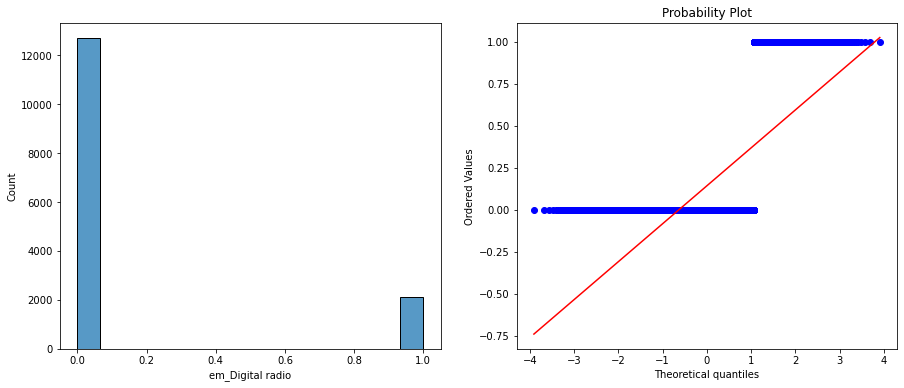

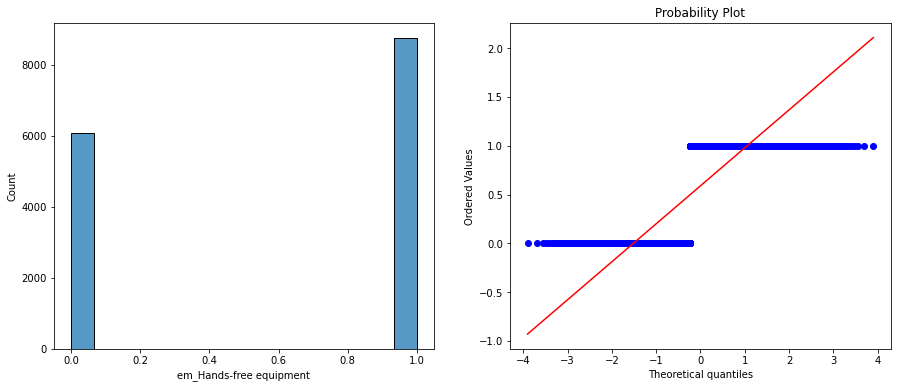

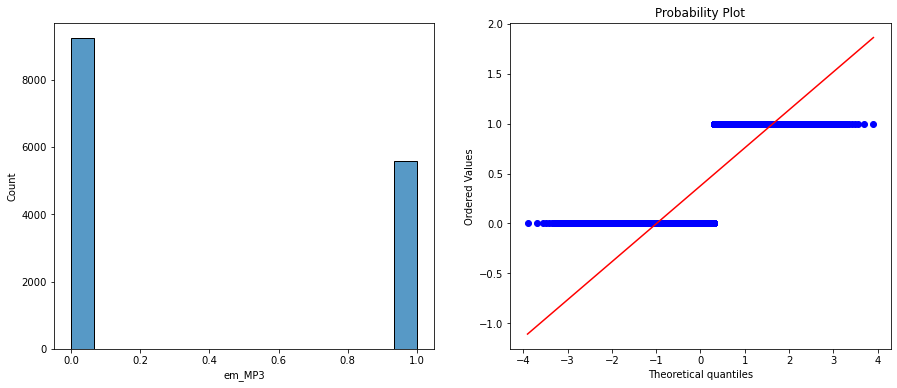

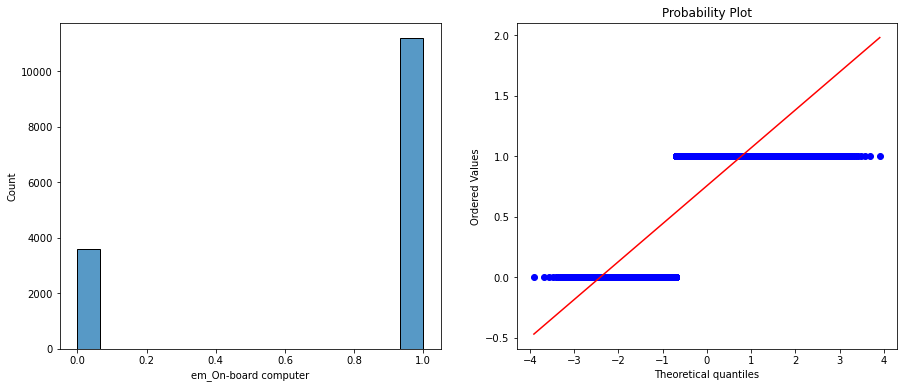

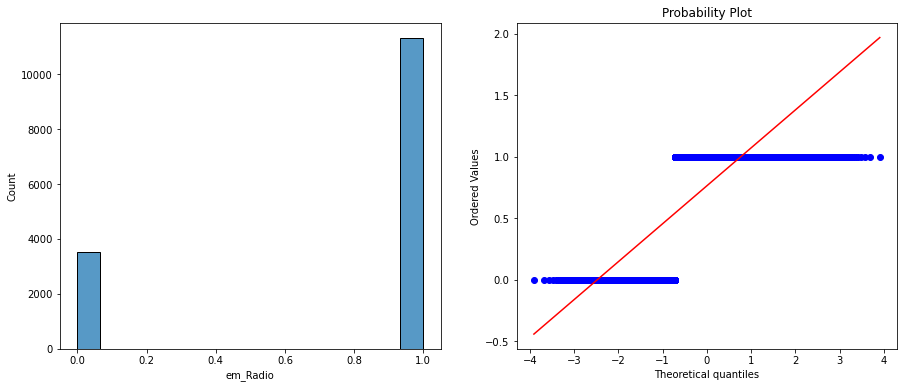

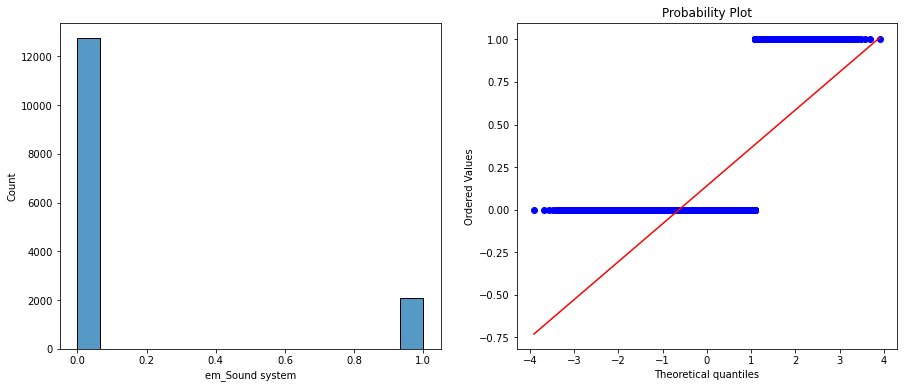

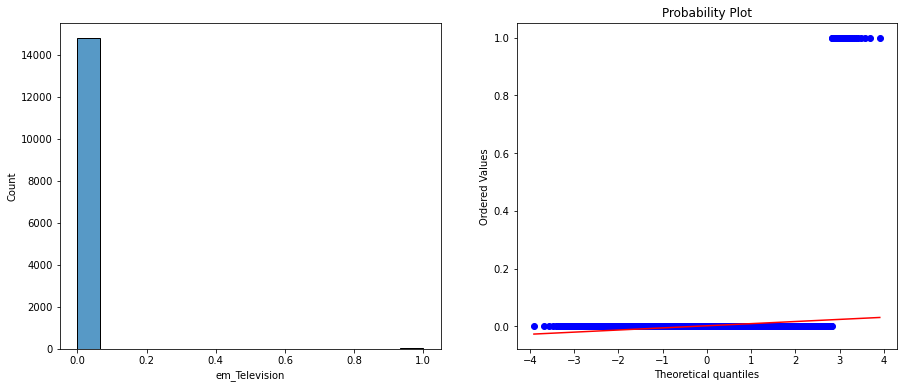

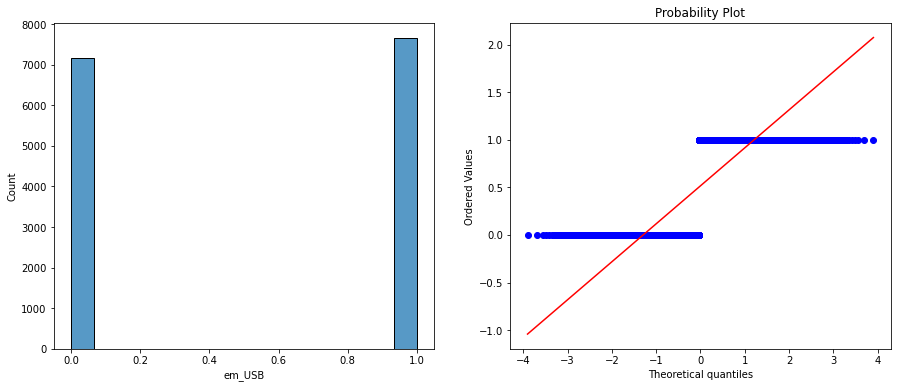

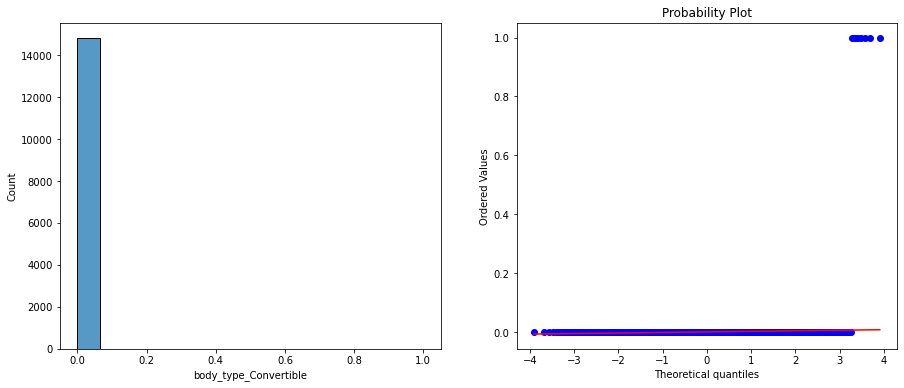

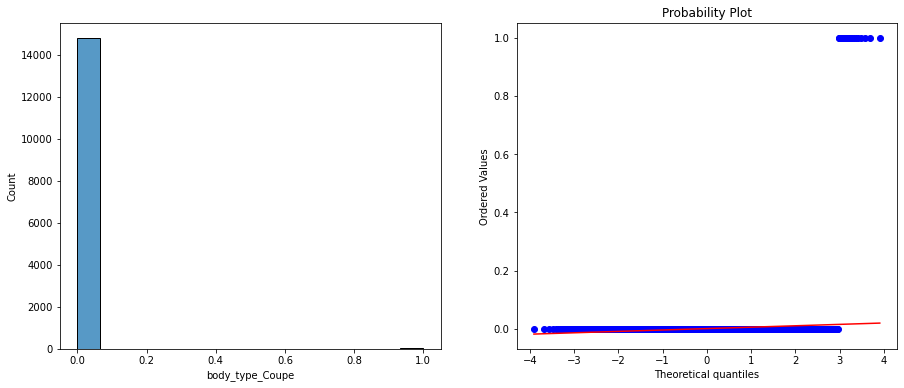

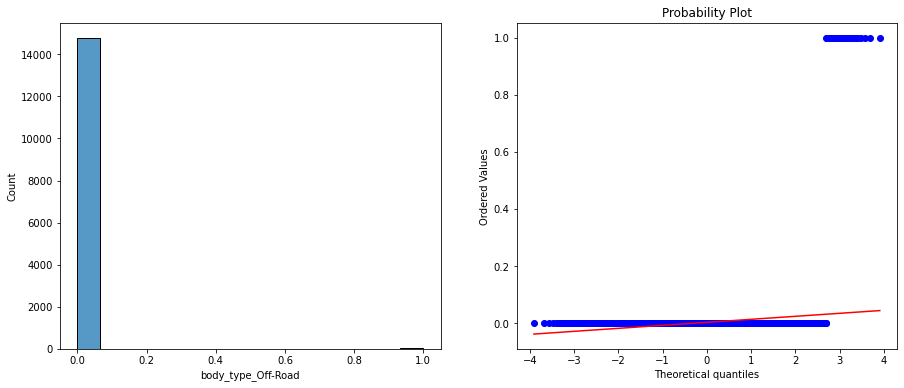

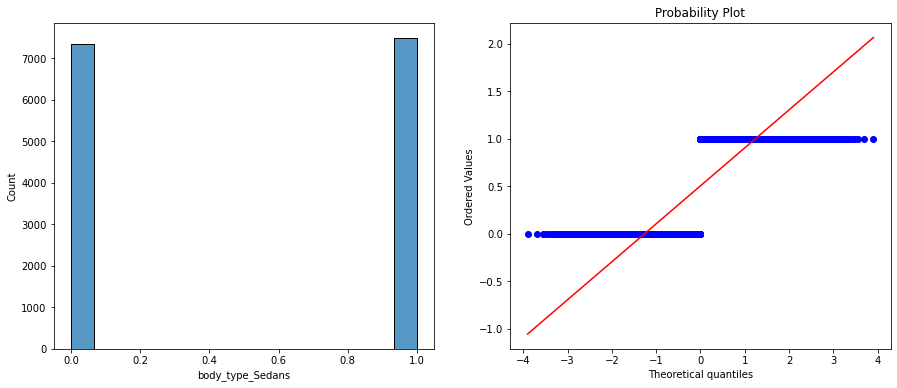

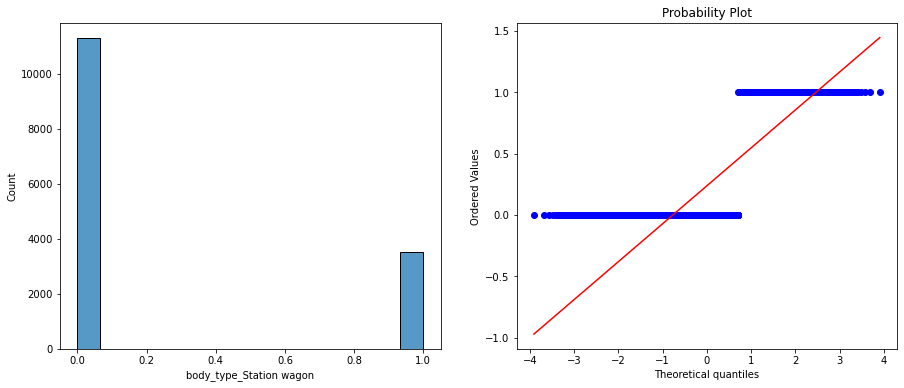

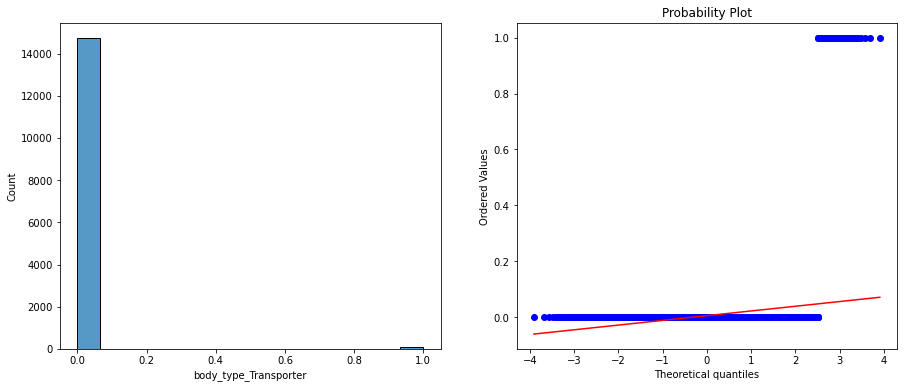

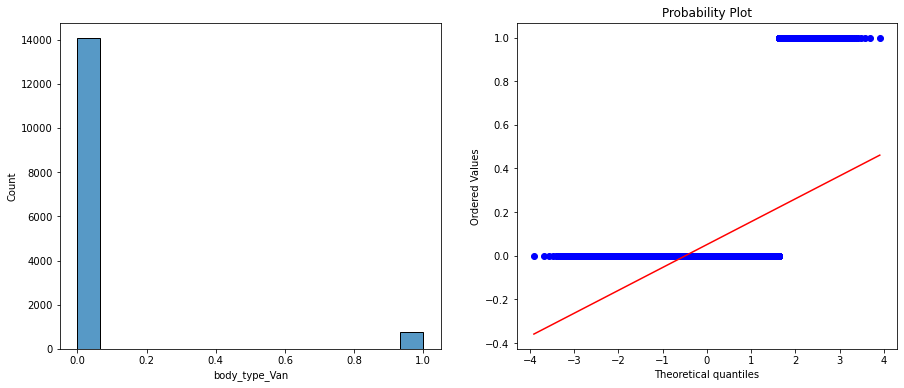

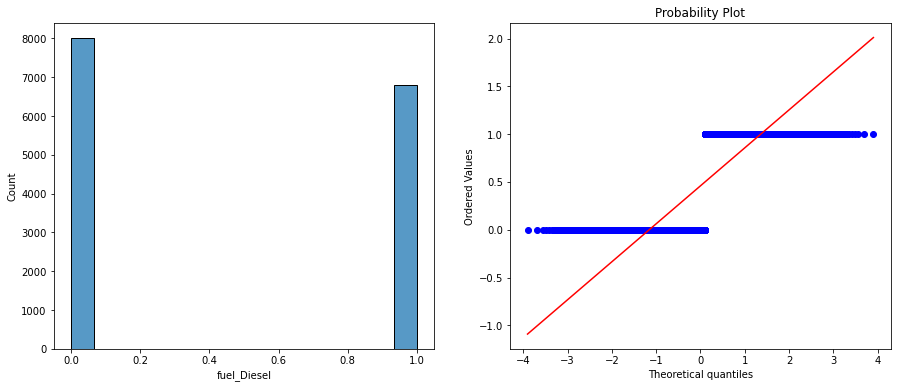

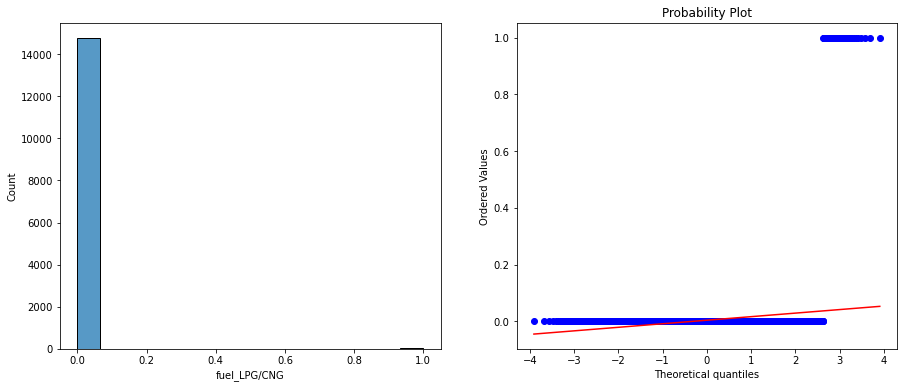

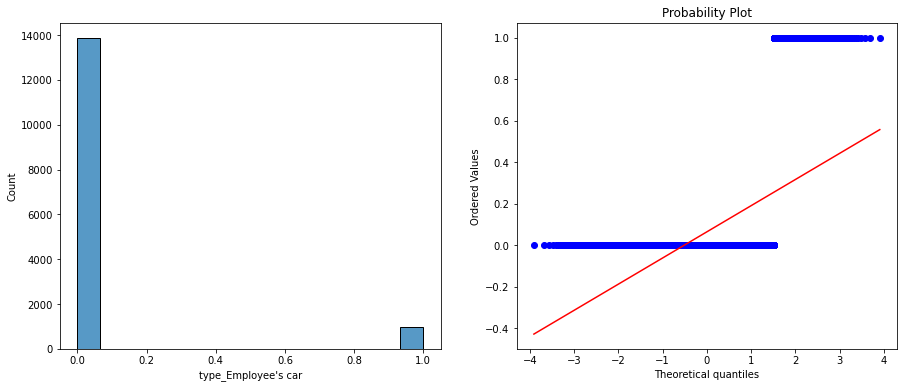

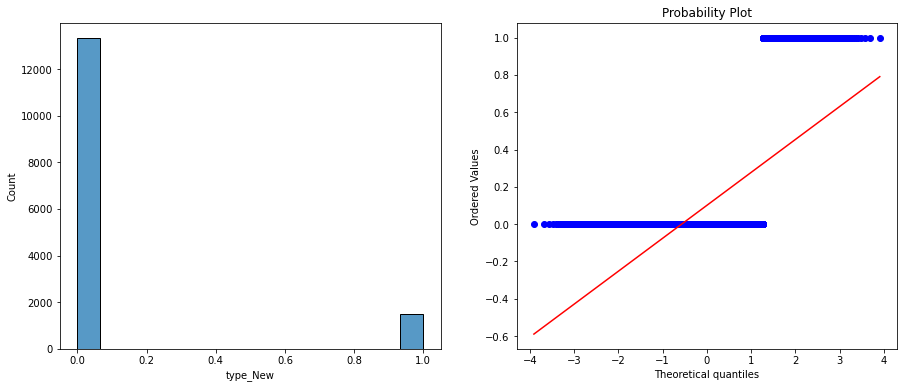

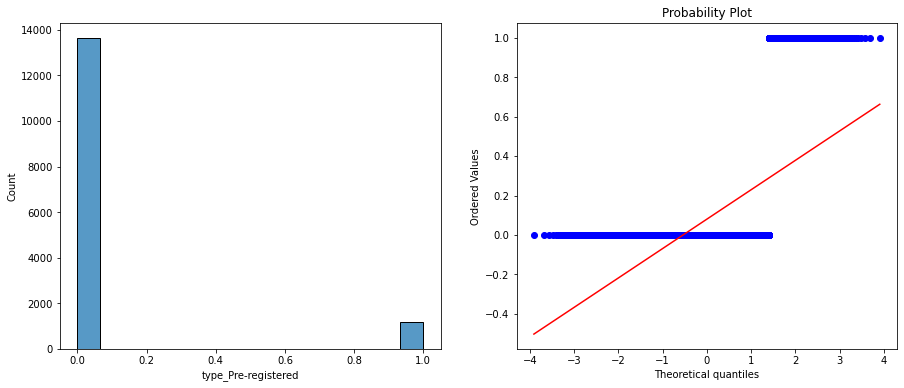

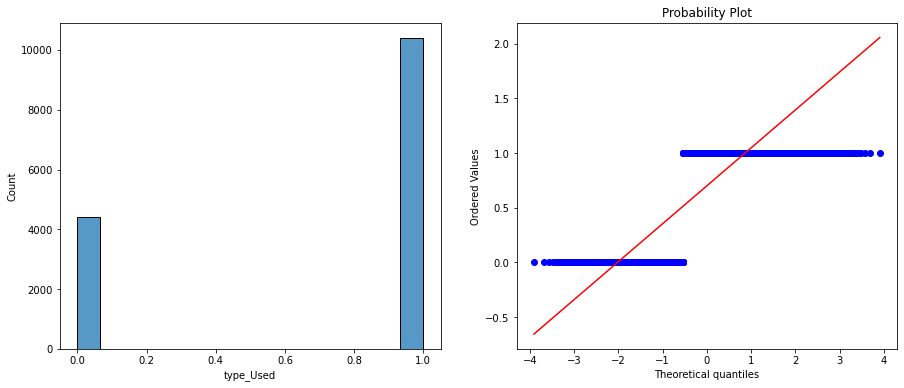

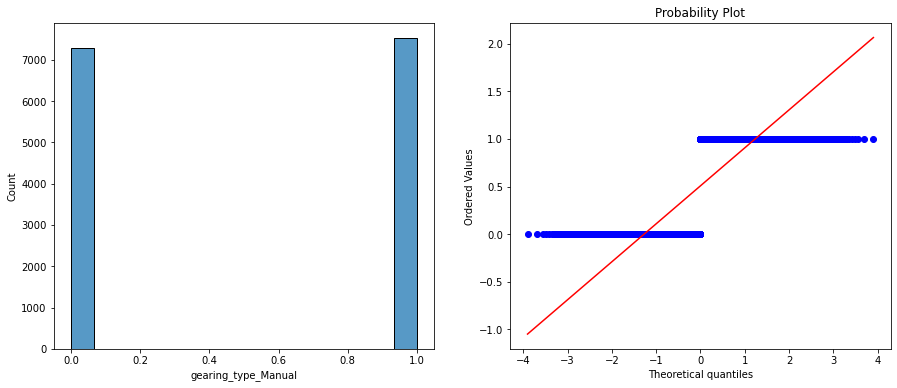

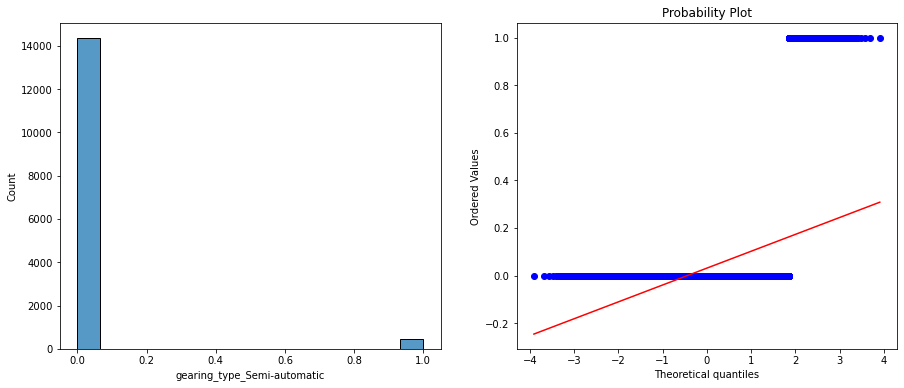

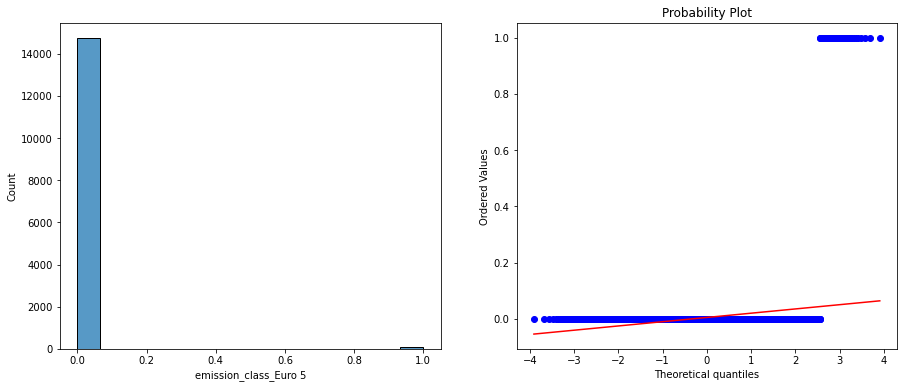

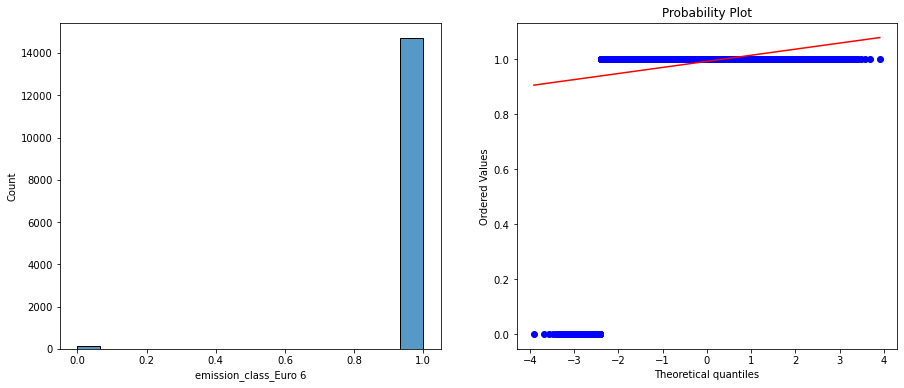

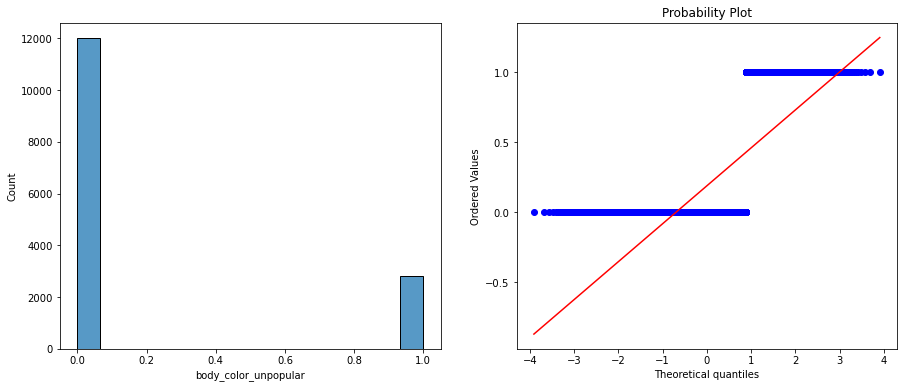

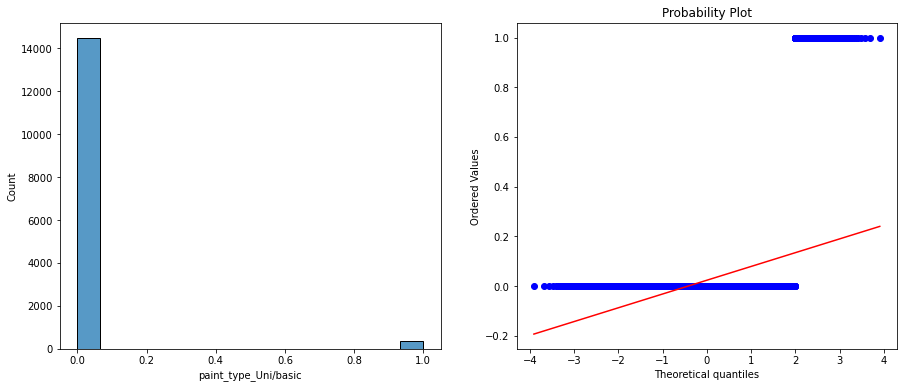

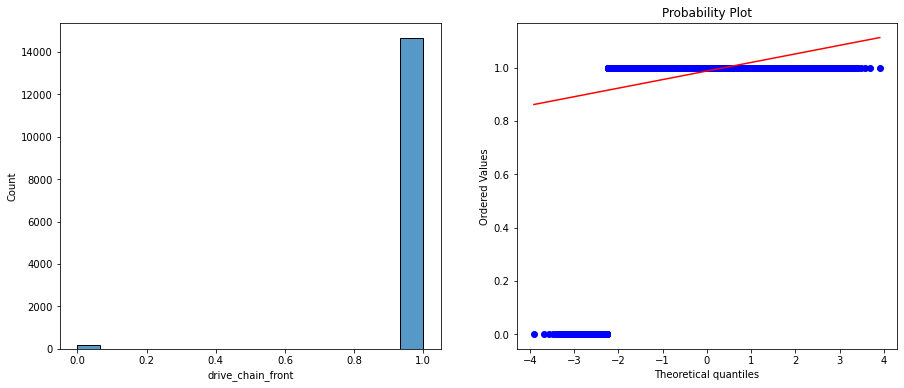

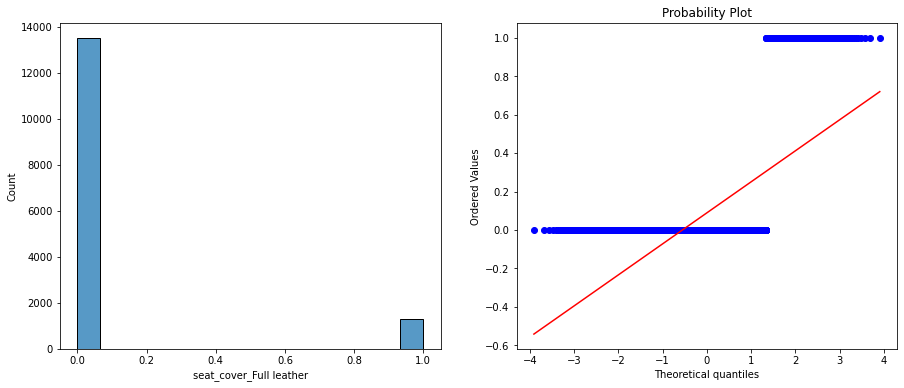

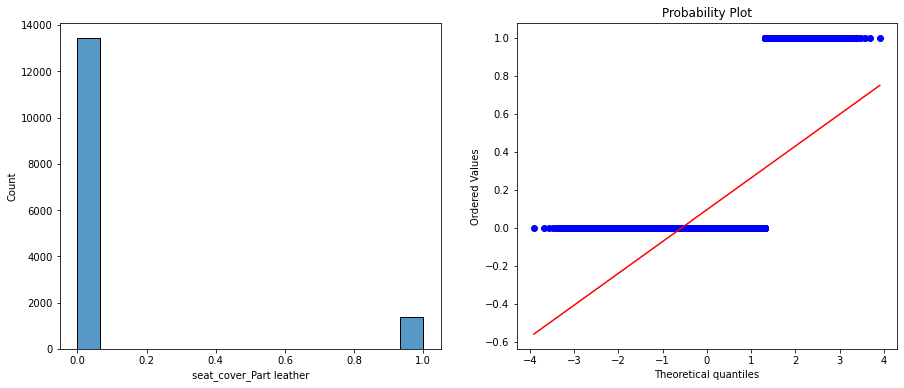

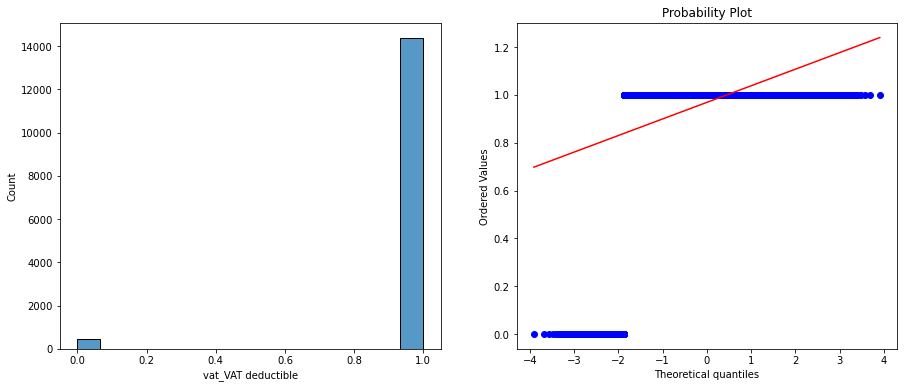

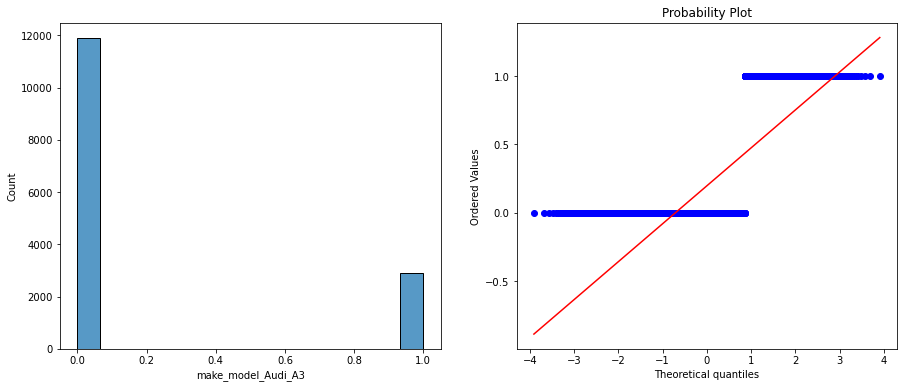

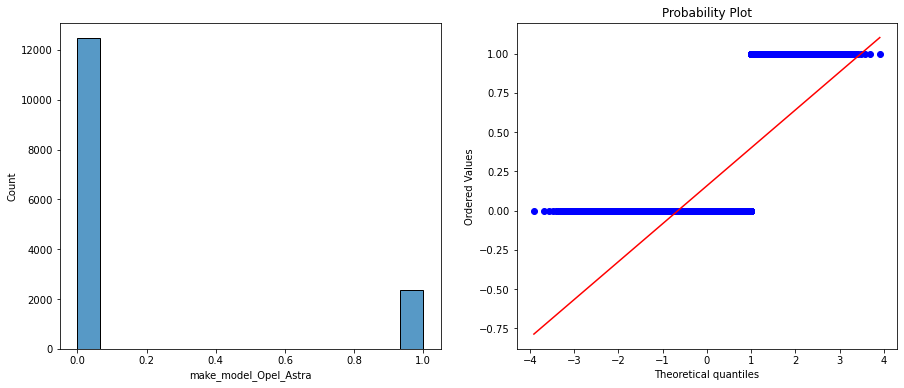

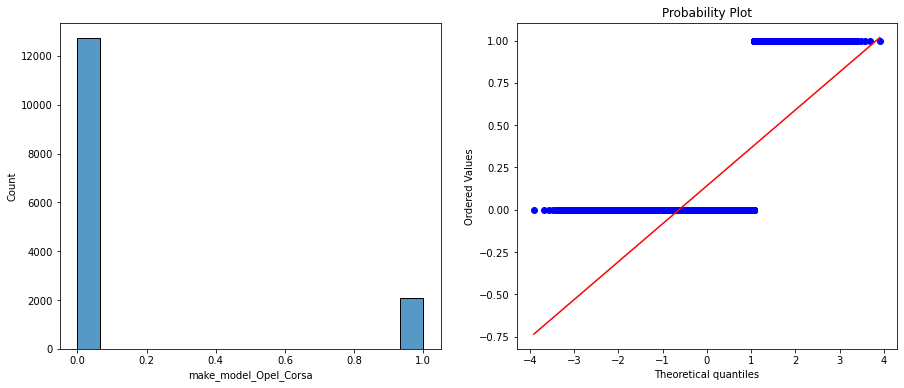

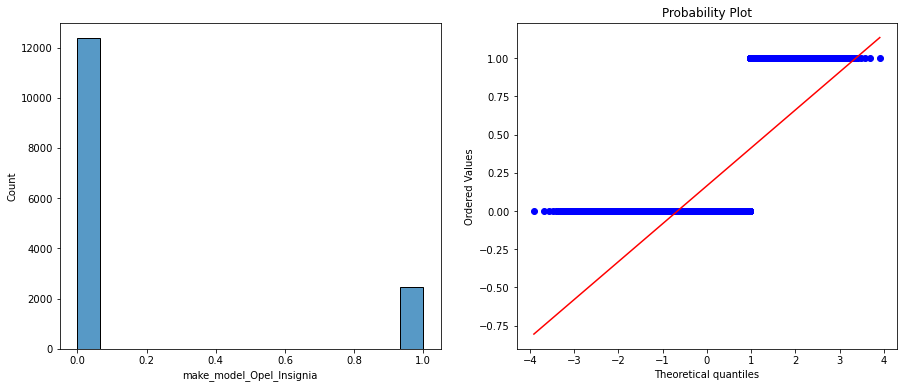

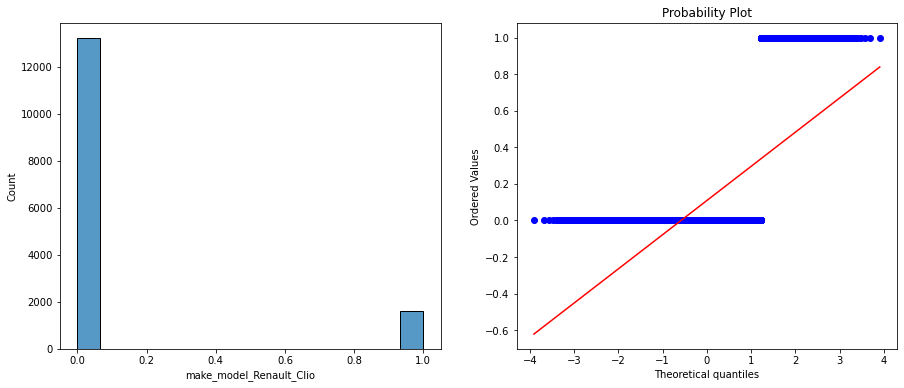

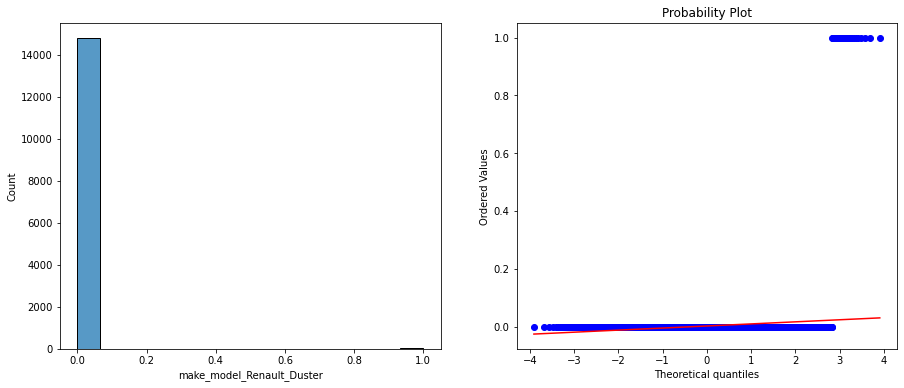

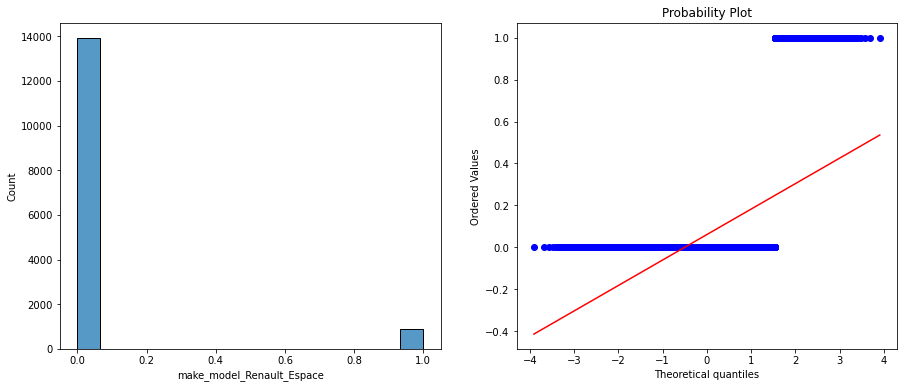

In [107]:
for col in df.drop("price", axis=1).columns:
    check_dist(df, col)

In [108]:
def color_red(val):
    
    if (val > 0.90 and val < 1) or (val < -0.90 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

In [109]:
df.iloc[:,0:12].corr()

age  price     km  hp_kw  previous_owners  \
age                 1.000 -0.470  0.756 -0.081            0.346   
price              -0.470  1.000 -0.394  0.701           -0.180   
km                  0.756 -0.394  1.000  0.016            0.195   
hp_kw              -0.081  0.701  0.016  1.000           -0.045   
previous_owners     0.346 -0.180  0.195 -0.045            1.000   
displacement_in_cc  0.222  0.263  0.311  0.581            0.058   
cylinders           0.157  0.006  0.202  0.304            0.063   
weight              0.080  0.471  0.177  0.689            0.005   
nr_of_doors        -0.088  0.157 -0.005  0.125           -0.124   
nr_of_seats        -0.087  0.240 -0.012  0.283           -0.028   
gears              -0.069  0.554 -0.033  0.477           -0.021   
consumption_avg    -0.364  0.255 -0.333  0.355           -0.124   

                    displacement_in_cc  cylinders  weight  nr_of_doors  \
age                              0.222      0.157   0.080       -0.088   
price                            0.263      0.006   0.471        0.157   
km                               0.311      0.202   0.177       -0.005   
hp_kw                            0.581      0.304   0.689        0.125   
previous_owners                  0.058      0.063   0.005       -0.124   
displacement_in_cc               1.000      0.605   0.558        0.076   
cylinders                        0.605      1.000   0.345        0.048   
weight                           0.558      0.345   1.000        0.160   
nr_of_doors                      0.076      0.048   0.160        1.000   
nr_of_seats                      0.190      0.250   0.351        0.105   
gears                            0.349      0.104   0.352        0.115   
consumption_avg                  0.001      0.157   0.132       -0.072   

                    nr_of_seats  gears  consumption_avg  
age                      -0.087 -0.069           -0.364  
price                     0.240  0.554            0.255  
km                       -0.012 -0.033           -0.333  
hp_kw                     0.283  0.477            0.355  
previous_owners          -0.028 -0.021           -0.124  
displacement_in_cc        0.190  0.349            0.001  
cylinders                 0.250  0.104            0.157  
weight                    0.351  0.352            0.132  
nr_of_doors               0.105  0.115           -0.072  
nr_of_seats               1.000  0.108            0.216  
gears                     0.108  1.000            0.035  
consumption_avg           0.216  0.035            1.000

<AxesSubplot:>

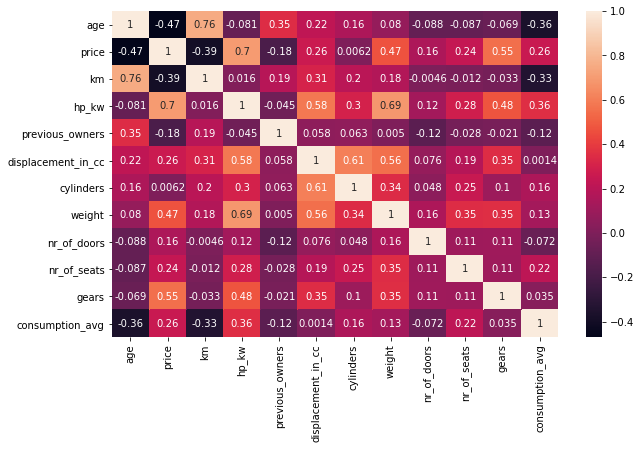

In [110]:
sns.heatmap(df.iloc[:,0:12].corr(), annot = True)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [111]:
X = df.drop(columns = "price", axis =1)
y = df["price"]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11852, 135)
Train target shape   :  (11852,)
Test features shape  :  (2963, 135)
Test target shape    :  (2963,)


In [115]:
X_train

age        km   hp_kw  previous_owners  displacement_in_cc  cylinders  \
6482  3.000 80274.000  81.000            1.000            1598.000      4.000   
11319 2.000 29920.000 121.000            1.000            1490.000      4.000   
11594 2.000 15018.000 103.000            1.000            1490.000      4.000   
10407 4.000 89000.000 100.000            1.000            1598.000      4.000   
5664  4.000 72500.000 100.000            1.000            1598.000      4.000   
...     ...       ...     ...              ...                 ...        ...   
5191  1.000    10.000  85.000            0.000             999.000      3.000   
13418 2.000 40000.000 162.000            1.000            1618.000      4.000   
5390  4.000 43400.000 112.000            1.000            1399.000      4.000   
860   3.000 16527.000  66.000            1.000            1422.000      3.000   
7270  1.000  4500.000 110.000            1.000            1399.000      4.000   

        weight  nr_of_doors  nr_of_seats  gears  consumption_avg  \
6482  1350.000        5.000        5.000  6.000            3.733   
11319 1522.000        4.000        5.000  6.000            6.400   
11594 1522.000        5.000        5.000  6.000            5.600   
10407 1701.000        5.000        5.000  6.000            4.167   
5664  1425.000        5.000        5.000  6.000            4.833   
...        ...          ...          ...    ...              ...   
5191  1360.000        5.000        5.000  6.000            5.100   
13418 1279.000        5.000        5.000  6.000            6.167   
5390  1350.000        5.000        5.000  6.000            5.733   
860   1135.000        5.000        5.000  5.000            3.767   
7270  1308.000        5.000        5.000  6.000            5.100   

       cc_Air conditioning  cc_Air suspension  cc_Armrest  \
6482                     1                  0           1   
11319                    1                  0           1   
11594                    1                  0           1   
10407                    1                  0           0   
5664                     1                  0           1   
...                    ...                ...         ...   
5191                     1                  0           1   
13418                    1                  0           1   
5390                     1                  0           0   
860                      1                  0           1   
7270                     1                  0           1   

       cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
6482                              0                     0                  1   
11319                             1                     0                  1   
11594                             1                     0                  1   
10407                             0                     0                  1   
5664                              1                     0                  1   
...                             ...                   ...                ...   
5191                              1                     0                  1   
13418                             1                     0                  1   
5390                              1                     0                  1   
860                               1                     0                  1   
7270                              1                     0                  1   

       cc_Electric Starter  cc_Electric tailgate  cc_Electrical side mirrors  \
6482                     0                     0                           1   
11319                    0                     1                           1   
11594                    0                     0                           1   
10407                    0                     0                           0   
5664                     0                     0                           1   
...                    ...                  

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [117]:
scaler.fit(X_train) 

StandardScaler()

In [118]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.55727092,  1.31739954, -0.27939938, ..., -0.35643303,
        -0.05120988, -0.25507079],
       [-0.34109346, -0.0522441 ,  1.23840946, ..., -0.35643303,
        -0.05120988, -0.25507079],
       [-0.34109346, -0.45758289,  0.55539548, ..., -0.35643303,
        -0.05120988, -0.25507079],
       ...,
       [ 1.4556353 ,  0.31441587,  0.89690247, ..., -0.35643303,
        -0.05120988, -0.25507079],
       [ 0.55727092, -0.41653765, -0.8485777 , ..., -0.35643303,
        -0.05120988, -0.25507079],
       [-1.23945784, -0.74367559,  0.82101203, ..., -0.35643303,
        -0.05120988, -0.25507079]])

In [119]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.4556353 ,  1.03794371, -0.27939938, ..., -0.35643303,
        -0.05120988, -0.25507079],
       [-0.34109346, -0.08270843, -0.8485777 , ...,  2.80557614,
        -0.05120988, -0.25507079],
       [ 1.4556353 ,  1.8403524 ,  0.82101203, ..., -0.35643303,
        -0.05120988, -0.25507079],
       ...,
       [-0.34109346, -0.16708375, -0.43118027, ..., -0.35643303,
        -0.05120988, -0.25507079],
       [-0.34109346, -0.31766458,  1.39019034, ..., -0.35643303,
        -0.05120988, -0.25507079],
       [-1.23945784, -0.68111492,  1.39019034, ..., -0.35643303,
        -0.05120988, -0.25507079]])

In [120]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

0     1     2      3     4      5     6      7     8     9     10   \
mean 0.000 0.000 0.000 -0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 0.000   
std  1.000 1.000 1.000  1.000 1.000  1.000 1.000  1.000 1.000 1.000 1.000   

       11     12    13     14    15     16    17     18    19     20     21   \
mean 0.000 -0.000 0.000 -0.000 0.000 -0.000 0.000 -0.000 0.000 -0.000 -0.000   
std  1.000  1.000 1.000  1.000 1.000  1.000 1.000  1.000 1.000  1.000  1.000   

       22     23    24     25    26     27     28     29    30     31    32   \
mean 0.000 -0.000 0.000 -0.000 0.000 -0.000 -0.000 -0.000 0.000 -0.000 0.000   
std  1.000  1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000 1.000   

        33    34     35     36     37    38    39     40    41    42    43   \
mean -0.000 0.000 -0.000 -0.000 -0.000 0.000 0.000 -0.000 0.000 0.000 0.000   
std   1.000 1.000  1.000  1.000  1.000 1.000 1.000  1.000 1.000 1.000 1.000   

        44     45    46     47    48    49     50    51    52     53    54   \
mean -0.000 -0.000 0.000 -0.000 0.000 0.000 -0.000 0.000 0.000 -0.000 0.000   
std   1.000  1.000 1.000  1.000 1.000 1.000  1.000 1.000 1.000  1.000 1.000   

       55    56     57     58    59     60    61     62    63    64     65   \
mean 0.000 0.000 -0.000 -0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 -0.000   
std  1.000 1.000  1.000  1.000 1.000  1.000 1.000  1.000 1.000 1.000  1.000   

       66     67     68     69     70     71    72     73     74    75   \
mean 0.000 -0.000 -0.000 -0.000 -0.000 -0.000 0.000 -0.000 -0.000 0.000   
std  1.000  1.000  1.000  1.000  1.000  1.000 1.000  1.000  1.000 1.000   

        76    77    78    79     80     81     82     83     84     85   \
mean -0.000 0.000 0.000 0.000 -0.000 -0.000 -0.000 -0.000 -0.000 -0.000   
std   1.000 1.000 1.000 1.000  1.000  1.000  1.000  1.000  1.000  1.000   

        86    87     88    89     90     91     92     93    94     95    96   \
mean -0.000 0.000 -0.000 0.000 -0.000 -0.000 -0.000 -0.000 0.000 -0.000 0.000   
std   1.000 1.000  1.000 1.000  1.000  1.000  1.000  1.000 1.000  1.000 1.000   

       97    98     99     100   101    102   103    104    105    106    107  \
mean 0.000 0.000 -0.000 -0.000 0.000 -0.000 0.000 -0.000 -0.000 -0.000 -0.000   
std  1.000 1.000  1.000  1.000 1.000  1.000 1.000  1.000  1.000  1.000  1.000   

       108    109   110   111   112   113   114   115   116    117    118  \
mean 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 -0.000   
std  1.000  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000  1.000  1.000   

        119    120   121   122    123   124   125   126   127   128    129  \
mean -0.000 -0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 -0.000   
std   1.000  1.000 1.000 1.000  1.000 1.000 1.000 1.000 1.000 1.000  1.000   

       130   131    132    133    134  
mean 0.000 0.000 -0.000 -0.000 -0.000  
std  1.000 1.000  1.000  1.000  1.000

In [121]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

0     1     2     3     4     5     6      7     8     9      10   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000 -0.000   
std  1.000 1.000 1.000 1.000 1.000 1.000 1.000  1.000 1.000 1.000  1.000   

       11    12    13     14    15     16     17    18    19     20    21   \
mean 0.000 0.000 0.000 -0.000 0.000 -0.000 -0.000 0.000 0.000 -0.000 0.000   
std  1.000 1.000 1.000  1.000 1.000  1.000  0.000 1.000 1.000  1.000 1.000   

       22    23     24     25     26    27    28     29    30    31    32   \
mean 0.000 0.000 -0.000 -0.000 -0.000 0.000 0.000 -0.000 0.000 0.000 0.000   
std  1.000 1.000  1.000  1.000  1.000 1.000 1.000  1.000 1.000 1.000 1.000   

       33    34    35    36    37    38    39    40    41    42     43    44   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000   
std  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000  1.000 1.000   

       45    46    47    48    49    50    51    52    53    54     55    56   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000   
std  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000  1.000 1.000   

       57    58    59    60    61    62    63    64    65     66    67    68   \
mean 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000   
std  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000  1.000 1.000 1.000   

       69    70    71     72    73    74    75    76    77    78    79    80   \
mean 0.000 0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000   
std  1.000 1.000 1.000  1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000   

        81     82     83    84     85     86     87    88    89    90    91   \
mean -0.000 -0.000 -0.000 0.000 -0.000 -0.000 -0.000 0.000 0.000 0.000 0.000   
std   1.000  0.000  1.000 1.000  1.000  0.000  1.000 1.000 1.000 1.000 1.000   

        92    93     94     95    96    97    98    99     100   101   102  \
mean -0.000 0.000 -0.000 -0.000 0.000 0.000 0.000 0.000 -0.000 0.000 0.000   
std   0.000 1.000  1.000  1.000 1.000 1.000 1.000 1.000  1.000 1.000 1.000   

       103   104    105   106    107   108   109   110   111   112   113  \
mean 0.000 0.000 -0.000 0.000 -0.000 0.000 0.000 0.000 0.000 0.000 0.000   
std  1.000 1.000  1.000 1.000  1.000 1.000 1.000 1.000 1.000 1.000 1.000   

       114    115   116   117    118   119    120   121    122    123   124  \
mean 0.000 -0.000 0.000 0.000 -0.000 0.000 -0.000 0.000 -0.000 -0.000 0.000   
std  1.000  1.000 1.000 1.000  1.000 1.000  1.000 1.000  1.000  1.000 1.000   

        125   126   127   128    129   130    131    132    133   134  
mean -0.000 0.000 0.000 0.000 -0.000 0.000 -0.000 -0.000 -0.000 0.000  
std   1.000 1.000 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000

In [122]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -10.732943605151968 - 108.86229834061011
X_test_range   : -10.732943605151968 - 41.1356640537485


## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [123]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [124]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [125]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [127]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

linear_train  linear_test
R2           0.894        0.890
mae       1675.015     1679.430
mse    5740523.797  6404070.710
rmse      2395.939     2530.627

In [128]:
from sklearn.model_selection import cross_validate, cross_val_score

In [131]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [132]:
pd.DataFrame(scores, index = range(1,11))

fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
1      0.043       0.002    0.891                     -1744.423   
2      0.039       0.002    0.891                     -1687.070   
3      0.034       0.002    0.889                     -1680.326   
4      0.033       0.001    0.880                     -1780.853   
5      0.037       0.002    0.889                     -1617.393   
6      0.036       0.002    0.887                     -1706.174   
7      0.036       0.002    0.888                     -1683.335   
8      0.037       0.002    0.896                     -1712.223   
9      0.037       0.002    0.901                     -1671.859   
10     0.034       0.002    0.876                     -1750.598   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                  -6614490.610                         -2571.865  
2                  -6160300.419                         -2481.995  
3                  -5577239.724                         -2361.618  
4                  -7142299.251                         -2672.508  
5                  -5458056.101                         -2336.248  
6                  -5624608.017                         -2371.626  
7                  -5583082.695                         -2362.855  
8                  -5909157.435                         -2430.876  
9                  -5424619.255                         -2329.081  
10                 -6820041.334                         -2611.521

In [133]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                   0.889
test_neg_mean_absolute_error          -1703.425
test_neg_mean_squared_error        -6031389.484
test_neg_root_mean_squared_error      -2453.019
dtype: float64

In [134]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train  linear_test
R2           0.894        0.890
mae       1675.015     1679.430
mse    5740523.797  6404070.710
rmse      2395.939     2530.627

In [135]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0   -1728.174
1   -1406.519
2    2616.579
3      62.799
4    -390.958
5     216.051
6    -497.290
7     207.433
8     -31.468
9     434.717
10   -246.697
11    176.471
12    -26.139
13    -38.379
14     95.831
15    -27.475
16     79.440
17    -11.139
18     17.441
19     47.453
20     31.276
21    114.828
22    362.927
23    164.513
24     90.150
25    114.341
26    -49.162
27     80.553
28     50.239
29    -95.024
30     79.688
31    130.983
32    160.907
33    -47.891
34    214.031
35      8.476
36    156.803
37     94.153
38   -126.281
39     31.312
40    -83.009
41    -28.696
42    156.886
43    -78.898
44    -28.598
45     99.172
46     12.911
47    -35.150
48    -26.183
49    -24.158
50     31.243
51     36.504
52     42.181
53    -67.863
54   -136.377
55    -30.499
56    -90.042
57     10.784
58     43.578
59    -80.562
60      5.253
61   -215.268
62    -43.791
63     -5.875
64    -85.147
65   -145.359
66   -100.651
67    303.881
68    270.178
69     22.578
70    138.418
71   -211.096
72   -172.624
73     35.664
74     35.074
75     41.168
76     44.193
77   -202.173
78    188.411
79     10.525
80     25.234
81      6.949
82     -5.171
83      1.942
84     61.640
85    -69.433
86     13.630
87    176.552
88     59.802
89    -33.248
90   -182.315
91     25.254
92     29.734
93    -48.970
94      7.591
95   -272.082
96      7.677
97    261.418
98     33.356
99    -43.998
100   -73.986
101    98.128
102   -54.061
103   -57.782
104  -129.234
105    76.365
106     7.747
107    29.818
108    65.969
109   127.609
110  -129.260
111   314.900
112   231.962
113    -9.338
114  -685.115
115  -202.320
116  -503.287
117 -1216.036
118  -634.070
119   387.474
120    47.649
121    13.271
122  -106.454
123    13.828
124  -243.368
125   326.088
126    -6.535
127    41.374
128   524.847
129 -1413.577
130 -1832.428
131  -323.405
132 -1749.134
133  -443.340
134   863.562

In [136]:
residuals = y_test-y_pred

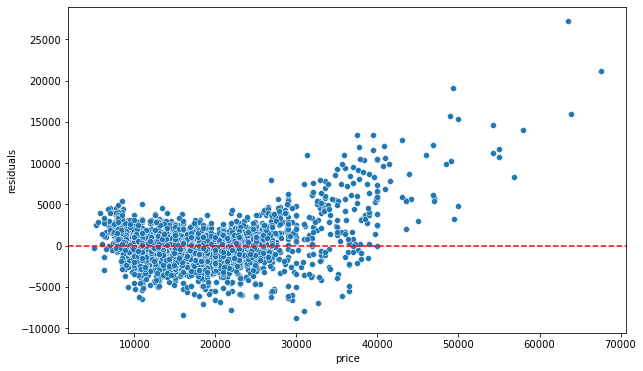

In [137]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

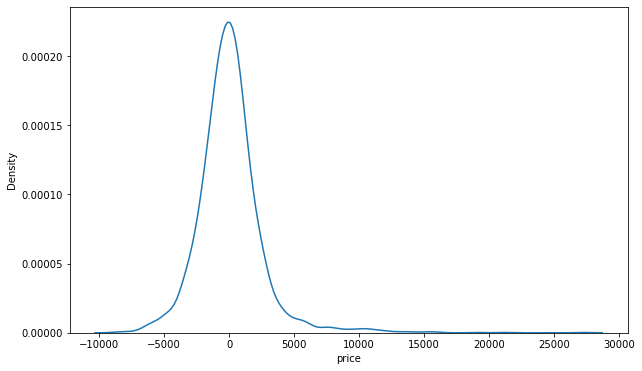

In [138]:
sns.kdeplot(residuals)

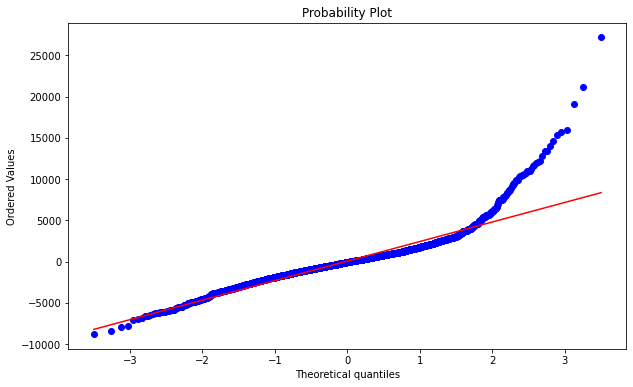

In [139]:
stats.probplot(residuals, dist ="norm", plot =plt);

In [140]:
from scipy.stats import skew
skew(residuals)

1.895787364743969

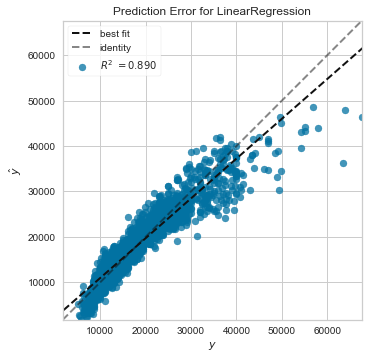

In [142]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [143]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [144]:
comparing = pd.DataFrame(my_dict)
comparing

Actual      Pred  Residual          LSE      ABS
6104    10900  7696.596  3203.404 10261799.793 3203.404
13606   10450 11520.883 -1070.883  1146789.953 1070.883
2629    17000 17344.941  -344.941   118984.521  344.941
1350    15972 15870.346   101.654    10333.478  101.654
11306   22880 21766.589  1113.411  1239684.514 1113.411
...       ...       ...       ...          ...      ...
6925    14990 13689.465  1300.535  1691390.226 1300.535
36      11890 11387.688   502.312   252317.797  502.312
6071    10989 10857.142   131.858    17386.634  131.858
11140   24250 25283.098 -1033.098  1067290.545 1033.098
12150   27900 23728.683  4171.317 17399884.554 4171.317

[2963 rows x 5 columns]

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [145]:
from sklearn.linear_model import Ridge

In [146]:
ridge_model = Ridge(alpha=1)

In [147]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [148]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [149]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

ridge_train  ridge_test
R2          0.894       0.890
mae      1674.976    1679.403
mse   5740524.766 6404241.336
rmse     2395.939    2530.660

In [150]:
pd.concat([ls, rs], axis=1)

linear_train  linear_test  ridge_train  ridge_test
R2           0.894        0.890        0.894       0.890
mae       1675.015     1679.430     1674.976    1679.403
mse    5740523.797  6404070.710  5740524.766 6404241.336
rmse      2395.939     2530.627     2395.939    2530.660

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [153]:
ridge_model = Ridge()

In [154]:
param_grid = {"alpha":alpha_space}

In [169]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [171]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.11; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END .........................................alpha=0.12; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.22; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END .........................................alpha=0.23; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.43; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END .........................................alpha=0.44; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.53; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.54; total time=   0.0s
[CV] END .........................................alpha=0.55; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.64; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END .........................................alpha=0.65; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.75; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END .........................................alpha=0.76; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.86; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END .........................................alpha=0.87; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [172]:
grid_ridge.best_params_

{'alpha': 1.0}

In [173]:
grid_ridge.best_score_

-2439.409103419901

In [159]:
alpha_space2 = np.linspace(1, 2, 100)
alpha_space2

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [161]:
param_grid2 = {"alpha":alpha_space2}

In [174]:
grid_ridge2 = GridSearchCV(estimator = ridge_model, param_grid = param_grid2, scoring = 'neg_root_mean_squared_error',
                         cv =10)

In [175]:
grid_ridge2.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626...
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747475,
       1.75757576, 1.76767677, 1.77777778, 1.78787879, 1.7979798 ,
       1.80808081, 1.81818182, 1.82828283, 1.83838384, 1.84848485,
       1.85858586, 1.86868687, 1.87878788, 1.88888889, 1.8989899 ,
       1.90909091, 1.91919192, 1.92929293, 1.93939394, 1.94949495,
       1.95959596, 1.96969697, 1.97979798, 1.98989899, 2.        ])},
             scoring='neg_root_mean_squared_error')

In [176]:
grid_ridge2.best_params_

{'alpha': 2.0}

In [177]:
grid_ridge2.best_score_

-2439.399219649504

In [178]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [179]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

grid_ridge_train  grid_ridge_test
R2               0.894            0.890
mae           1674.976         1679.403
mse        5740524.766      6404241.336
rmse          2395.939         2530.660

In [180]:
pd.concat([ls, rs, rgs], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.894       0.890             0.894   
mae       1675.015     1679.430     1674.976    1679.403          1674.976   
mse    5740523.797  6404070.710  5740524.766 6404241.336       5740524.766   
rmse      2395.939     2530.627     2395.939    2530.660          2395.939   

      grid_ridge_test  
R2              0.890  
mae          1679.403  
mse       6404241.336  
rmse         2530.660

In [205]:
rm = Ridge(alpha=1).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

array([-1.72798712e+03, -1.40650873e+03,  2.61548996e+03,  6.27713061e+01,
       -3.90123180e+02,  2.15331256e+02, -4.96730481e+02,  2.07432749e+02,
       -3.15943628e+01,  4.35082902e+02, -2.46699310e+02,  1.76476299e+02,
       -2.61159393e+01, -3.82137271e+01,  9.59403862e+01, -2.74923054e+01,
        7.92567236e+01, -1.11394877e+01,  1.74423893e+01,  4.73765687e+01,
        3.12539790e+01,  1.14807991e+02,  3.62982943e+02,  1.64271390e+02,
        9.00550739e+01,  1.14314177e+02, -4.91522728e+01,  8.05844754e+01,
        5.02024436e+01, -9.49821037e+01,  7.97007719e+01,  1.31005058e+02,
        1.60849829e+02, -4.78542195e+01,  2.14073567e+02,  8.49480800e+00,
        1.56784738e+02,  9.40892853e+01, -1.26221296e+02,  3.12837223e+01,
       -8.29135718e+01, -2.84910416e+01,  1.56907503e+02, -7.88350165e+01,
       -2.84279704e+01,  9.91921413e+01,  1.28540793e+01, -3.51429315e+01,
       -2.62060779e+01, -2.42767863e+01,  3.12408882e+01,  3.64470314e+01,
        4.21729807e+01, -

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [181]:
from sklearn.linear_model import Lasso

In [182]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [183]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [184]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

lasso_train  lasso_test
R2          0.894       0.890
mae      1674.535    1678.105
mse   5740858.281 6401402.169
rmse     2396.009    2530.099

In [185]:
pd.concat([ls, rs, rgs, lss], axis = 1)

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.894       0.890             0.894   
mae       1675.015     1679.430     1674.976    1679.403          1674.976   
mse    5740523.797  6404070.710  5740524.766 6404241.336       5740524.766   
rmse      2395.939     2530.627     2395.939    2530.660          2395.939   

      grid_ridge_test  lasso_train  lasso_test  
R2              0.890        0.894       0.890  
mae          1679.403     1674.535    1678.105  
mse       6404241.336  5740858.281 6401402.169  
rmse         2530.660     2396.009    2530.099

In [186]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [187]:
pd.DataFrame(scores, index = range(1, 11))

fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
1      0.255       0.002    0.891                     -1743.650   
2      0.254       0.002    0.891                     -1687.088   
3      0.254       0.002    0.889                     -1679.189   
4      0.243       0.002    0.880                     -1779.758   
5      0.256       0.002    0.889                     -1616.699   
6      0.241       0.002    0.887                     -1704.908   
7      0.281       0.002    0.888                     -1681.756   
8      0.366       0.004    0.896                     -1711.224   
9      0.291       0.002    0.901                     -1670.992   
10     0.257       0.002    0.889                     -1726.959   

    test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                  -6615555.212                         -2572.072  
2                  -6162323.819                         -2482.403  
3                  -5571621.309                         -2360.428  
4                  -7134280.000                         -2671.007  
5                  -5457187.536                         -2336.062  
6                  -5622646.326                         -2371.212  
7                  -5577008.467                         -2361.569  
8                  -5906680.484                         -2430.366  
9                  -5423681.114                         -2328.880  
10                 -6132047.728                         -2476.297

In [188]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.890
test_neg_mean_absolute_error          -1700.222
test_neg_mean_squared_error        -5960303.199
test_neg_root_mean_squared_error      -2439.030
dtype: float64

In [189]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

lasso_train  lasso_test
R2          0.894       0.890
mae      1674.535    1678.105
mse   5740858.281 6401402.169
rmse     2396.009    2530.099

In [190]:
lasso_model.coef_

array([-1.72882003e+03, -1.40582232e+03,  2.60989444e+03,  6.14926113e+01,
       -3.78119720e+02,  2.06808276e+02, -4.89501749e+02,  2.06549452e+02,
       -3.08961519e+01,  4.36319433e+02, -2.47975515e+02,  1.76070932e+02,
       -2.49005116e+01, -3.38549810e+01,  9.54460111e+01, -2.64891837e+01,
        7.73596789e+01, -1.02229508e+01,  1.63733560e+01,  4.49221006e+01,
        2.96078431e+01,  1.14040576e+02,  3.63495235e+02,  1.61090784e+02,
        8.79127791e+01,  1.13183909e+02, -4.86350073e+01,  7.88520385e+01,
        4.59369949e+01, -9.27153813e+01,  7.92138562e+01,  1.28211222e+02,
        1.59327663e+02, -4.53654268e+01,  2.08704612e+02,  7.21149933e+00,
        1.56106529e+02,  9.07737737e+01, -1.18684553e+02,  2.84596586e+01,
       -7.83208115e+01, -2.35353301e+01,  1.57259017e+02, -7.61084994e+01,
       -2.59876494e+01,  9.76850467e+01,  1.00169059e+01, -3.35635674e+01,
       -2.54194922e+01, -2.36299270e+01,  3.02640894e+01,  3.43651950e+01,
        4.08916015e+01, -

In [191]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [194]:
pd.concat([lm_df, lsm_df], axis = 1)

lm_coef  lasso_coef_1
0   -1728.174     -1728.820
1   -1406.519     -1405.822
2    2616.579      2609.894
3      62.799        61.493
4    -390.958      -378.120
5     216.051       206.808
6    -497.290      -489.502
7     207.433       206.549
8     -31.468       -30.896
9     434.717       436.319
10   -246.697      -247.976
11    176.471       176.071
12    -26.139       -24.901
13    -38.379       -33.855
14     95.831        95.446
15    -27.475       -26.489
16     79.440        77.360
17    -11.139       -10.223
18     17.441        16.373
19     47.453        44.922
20     31.276        29.608
21    114.828       114.041
22    362.927       363.495
23    164.513       161.091
24     90.150        87.913
25    114.341       113.184
26    -49.162       -48.635
27     80.553        78.852
28     50.239        45.937
29    -95.024       -92.715
30     79.688        79.214
31    130.983       128.211
32    160.907       159.328
33    -47.891       -45.365
34    214.031       208.705
35      8.476         7.211
36    156.803       156.107
37     94.153        90.774
38   -126.281      -118.685
39     31.312        28.460
40    -83.009       -78.321
41    -28.696       -23.535
42    156.886       157.259
43    -78.898       -76.108
44    -28.598       -25.988
45     99.172        97.685
46     12.911        10.017
47    -35.150       -33.564
48    -26.183       -25.419
49    -24.158       -23.630
50     31.243        30.264
51     36.504        34.365
52     42.181        40.892
53    -67.863       -63.944
54   -136.377      -133.169
55    -30.499       -29.121
56    -90.042       -87.729
57     10.784         9.691
58     43.578        41.671
59    -80.562       -77.785
60      5.253         4.907
61   -215.268      -214.887
62    -43.791       -43.895
63     -5.875        -4.336
64    -85.147       -82.377
65   -145.359      -143.599
66   -100.651       -99.904
67    303.881       303.863
68    270.178       270.866
69     22.578        20.916
70    138.418       137.552
71   -211.096      -208.771
72   -172.624      -172.539
73     35.664        35.343
74     35.074        31.246
75     41.168        39.748
76     44.193        42.345
77   -202.173      -199.005
78    188.411       189.348
79     10.525         9.137
80     25.234        23.082
81      6.949         5.349
82     -5.171        -4.598
83      1.942         0.834
84     61.640        60.986
85    -69.433       -68.403
86     13.630        12.970
87    176.552       175.905
88     59.802        57.056
89    -33.248       -30.123
90   -182.315      -181.717
91     25.254        23.037
92     29.734        28.614
93    -48.970       -47.641
94      7.591         5.969
95   -272.082      -270.201
96      7.677         5.339
97    261.418       260.828
98     33.356        28.345
99    -43.998       -42.060
100   -73.986       -72.291
101    98.128        96.703
102   -54.061       -52.476
103   -57.782       -56.707
104  -129.234      -127.790
105    76.365        75.117
106     7.747         6.437
107    29.818        23.654
108    65.969        60.392
109   127.609       120.230
110  -129.260      -128.948
111   314.900       311.482
112   231.962       222.985
113    -9.338        -8.633
114  -685.115      -677.333
115  -202.320      -195.077
116  -503.287      -495.543
117 -1216.036     -1203.415
118  -634.070      -634.913
119   387.474       386.523
120    47.649        35.685
121    13.271         0.000
122  -106.454      -105.557
123    13.828        12.578
124  -243.368      -241.909
125   326.088       326.928
126    -6.535        -4.407
127    41.374        40.404
128   524.847       529.509
129 -1413.577     -1399.944
130 -1832.428     -1821.911
131  -323.405      -311.995
132 -1749.134     -1737.317
133  -443.340      -443.786
134   863.562       867.987

In [195]:
lasso_model = Lasso(max_iter=100000)

In [241]:
param_grid = {"alpha":[1,3,4,5,6]}

In [196]:
#param_grid = {"alpha":alpha_space}

In [242]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [243]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.2s
[CV] END ............................................alpha=1; total time=   0.1s
[CV] END ............................................alpha=3; total time=   0.1s
[CV] END .......................................

GridSearchCV(cv=10, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1, 3, 4, 5, 6]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [244]:
grid_lasso.best_params_

{'alpha': 4}

In [245]:
pd.DataFrame(grid_lasso.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0          0.254         0.034            0.001           0.000           1   
1          0.213         0.014            0.001           0.000           3   
2          0.193         0.012            0.001           0.000           4   
3          0.200         0.030            0.001           0.000           5   
4          0.194         0.030            0.001           0.001           6   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1}          -2572.072          -2482.403          -2360.428   
1  {'alpha': 3}          -2573.000          -2483.777          -2358.574   
2  {'alpha': 4}          -2573.647          -2484.692          -2357.795   
3  {'alpha': 5}          -2574.407          -2485.531          -2357.160   
4  {'alpha': 6}          -2575.343          -2486.377          -2356.609   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -2671.007          -2336.062          -2371.212          -2361.569   
1          -2668.388          -2336.402          -2370.082          -2359.619   
2          -2667.553          -2336.803          -2369.632          -2358.855   
3          -2666.789          -2337.164          -2369.318          -2358.112   
4          -2666.051          -2337.399          -2369.088          -2357.357   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -2430.366          -2328.880          -2476.297        -2439.030   
1          -2429.679          -2328.907          -2478.216        -2438.664   
2          -2429.462          -2328.955          -2479.214        -2438.661   
3          -2429.374          -2329.119          -2480.191        -2438.716   
4          -2429.335          -2329.441          -2481.178        -2438.818   

   std_test_score  rank_test_score  
0         106.945                5  
1         106.944                2  
2         107.025                1  
3         107.106                3  
4         107.203                4

In [246]:
grid_lasso.best_score_

-2438.6606754500585

In [247]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [248]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

grid_lasso_train  grid_lasso_test
R2               0.894            0.890
mae           1673.633         1675.069
mse        5745701.932      6397610.184
rmse          2397.019         2529.350

In [249]:
lsm = Lasso(alpha=5).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([-1.73181716e+03, -1.40322315e+03,  2.58166447e+03,  5.58455459e+01,
       -3.27956986e+02,  1.73007264e+02, -4.59519604e+02,  2.03269832e+02,
       -2.81226654e+01,  4.42727491e+02, -2.51338925e+02,  1.73641081e+02,
       -2.04506866e+01, -1.70817108e+01,  9.38200455e+01, -2.27258308e+01,
        6.86952660e+01, -6.52185507e+00,  1.18774900e+01,  3.34504197e+01,
        2.31859220e+01,  1.11110158e+02,  3.65439386e+02,  1.46523037e+02,
        7.86701178e+01,  1.08607678e+02, -4.62546212e+01,  7.16876169e+01,
        2.81471006e+01, -8.41304066e+01,  7.68219851e+01,  1.16140295e+02,
        1.52722828e+02, -3.57698746e+01,  1.87326431e+02,  2.26045547e+00,
        1.52864781e+02,  7.75871773e+01, -8.85719530e+01,  1.74000968e+01,
       -5.89039282e+01, -2.59677517e+00,  1.58876655e+02, -6.49645251e+01,
       -1.55462353e+01,  9.18966355e+01,  0.00000000e+00, -2.76418745e+01,
       -2.23463125e+01, -2.13500808e+01,  2.59817736e+01,  2.58065297e+01,
        3.55636716e+01, -

In [ ]:
# 9 Feature elendi

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [250]:
from sklearn.linear_model import ElasticNet

In [251]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [252]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [253]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

elastic_train  elastic_test
R2            0.857         0.847
mae        1892.235      1914.744
mse     7764953.858   8953067.583
rmse       2786.567      2992.168

In [272]:
df_score = pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)
df_score

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.894       0.890             0.894   
mae       1675.015     1679.430     1674.976    1679.403          1674.976   
mse    5740523.797  6404070.710  5740524.766 6404241.336       5740524.766   
rmse      2395.939     2530.627     2395.939    2530.660          2395.939   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.890        0.894       0.890             0.894   
mae          1679.403     1674.535    1678.105          1673.633   
mse       6404241.336  5740858.281 6401402.169       5745701.932   
rmse         2530.660     2396.009    2530.099          2397.019   

      grid_lasso_test  elastic_train  elastic_test  
R2              0.890          0.857         0.847  
mae          1675.069       1892.235      1914.744  
mse       6397610.184    7764953.858   8953067.583  
rmse         2529.350       2786.567      2992.168

In [255]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [256]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

test_r2  test_neg_mean_absolute_error  test_neg_mean_squared_error  \
1     0.853                     -1982.115                 -8925808.630   
2     0.853                     -1904.562                 -8328814.255   
3     0.859                     -1840.712                 -7084795.496   
4     0.830                     -1993.165                -10128429.988   
5     0.856                     -1876.805                 -7038200.814   
6     0.858                     -1859.398                 -7072664.423   
7     0.858                     -1841.783                 -7085480.104   
8     0.863                     -1906.541                 -7807011.338   
9     0.864                     -1904.773                 -7457111.539   
10    0.847                     -1963.835                 -8437389.585   

    test_neg_root_mean_squared_error  
1                          -2987.609  
2                          -2885.969  
3                          -2661.728  
4                          -3182.519  
5                          -2652.961  
6                          -2659.448  
7                          -2661.857  
8                          -2794.103  
9                          -2730.771  
10                         -2904.719

In [257]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.854
test_neg_mean_absolute_error          -1907.369
test_neg_mean_squared_error        -7936570.617
test_neg_root_mean_squared_error      -2812.168
dtype: float64

In [258]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

elastic_train  elastic_test
R2            0.857         0.847
mae        1892.235      1914.744
mse     7764953.858   8953067.583
rmse       2786.567      2992.168

In [259]:
elastic_model.coef_

array([-1132.60129019, -1083.44115479,  1217.04809479,   -90.59474275,
         138.19219726,  -188.31653022,   311.32305209,   198.53763229,
          25.08875628,   742.99959235,   105.77538046,    69.92858624,
          -4.17344699,   165.11360571,   249.98754076,   -52.99757724,
         -23.55033591,   -19.35039562,    57.35926552,   -62.27923455,
          46.9902002 ,    63.12468865,   335.87537744,   -24.67962524,
         -18.82392854,    86.5100683 ,   -32.30597856,    74.6730825 ,
          72.75172223,   -52.9623623 ,   119.06110743,    64.93973611,
         136.35202   ,    41.37210298,   226.71631607,    44.69560057,
         130.51415389,    63.83384042,    24.64926605,   -16.99443552,
          83.49170328,   145.16626123,   161.67699317,   -19.94920916,
         165.15908147,   100.05040662,   -35.10619362,   -33.71802092,
         -39.66231493,   -99.6557524 ,    94.44104956,     2.00806824,
          24.17072762,    55.15937603,  -114.87941905,   -85.12626219,
      

In [260]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
elastic_model = ElasticNet(max_iter=10000)

In [263]:
param_grid = {"alpha":[1, 2, 3, 4, 5, 6],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [264]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [265]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.1s
[CV] END ..............................alpha=1

[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   0.1s
[CV] END .............................alpha=2, l1_ratio=0.95; total time=   0.1s
[CV] END .............................alpha=2, l1_ratio=0.95; total time=   0.1s
[CV] END .............................alpha=2, l1_ratio=0.95; total time=   0.1s
[CV] END ...................

[CV] END ................................alpha=3, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.1s
[CV] END ..............................alpha=5, l1_ratio=0.9; total time=   0.1s
[CV] END ...................

[CV] END .............................alpha=6, l1_ratio=0.99; total time=   0.0s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.0s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s
[CV] END ................................alpha=6, l1_ratio=1; total time=   0.1s


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [266]:
grid_model.best_params_

{'alpha': 4, 'l1_ratio': 1}

In [267]:
pd.DataFrame(grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.147         0.013            0.001           0.000           1   
1           0.161         0.007            0.001           0.000           1   
2           0.180         0.018            0.001           0.000           1   
3           0.229         0.012            0.001           0.000           1   
4           0.252         0.032            0.001           0.000           1   
5           0.241         0.014            0.001           0.000           1   
6           0.253         0.034            0.001           0.000           1   
7           0.114         0.014            0.001           0.000           2   
8           0.161         0.054            0.001           0.000           2   
9           0.163         0.023            0.002           0.001           2   
10          0.181         0.026            0.001           0.000           2   
11          0.197         0.022            0.001           0.000           2   
12          0.194         0.008            0.001           0.000           2   
13          0.239         0.037            0.001           0.000           2   
14          0.071         0.008            0.001           0.000           3   
15          0.091         0.013            0.001           0.000           3   
16          0.122         0.018            0.002           0.001           3   
17          0.199         0.034            0.001           0.000           3   
18          0.210         0.022            0.001           0.000           3   
19          0.221         0.019            0.001           0.000           3   
20          0.229         0.024            0.001           0.000           3   
21          0.084         0.010            0.001           0.000           4   
22          0.076         0.006            0.001           0.000           4   
23          0.094         0.010            0.001           0.000           4   
24          0.152         0.015            0.001           0.001           4   
25          0.171         0.021            0.001           0.000           4   
26          0.238         0.040            0.002           0.001           4   
27          0.234         0.040            0.001           0.000           4   
28          0.069         0.008            0.002           0.001           5   
29          0.078         0.010            0.001           0.000           5   
30          0.102         0.010            0.002           0.001           5   
31          0.132         0.017            0.001           0.001           5   
32          0.186         0.019            0.001           0.000           5   
33          0.215         0.021            0.002           0.001           5   
34          0.219         0.018            0.001           0.000           5   
35          0.064         0.004            0.001           0.000           6   
36          0.066         0.006            0.001           0.000           6   
37          0.073         0.009            0.001           0.001           6   
38          0.114         0.015            0.001           0.000           6   
39          0.158         0.010            0.001           0.001           6   
40          0.173         0.019            0.001           0.000           6   
41          0.168         0.012            0.001           0.000           6   

   param_l1_ratio                          params  split0_test_score  \
0           0.100   {'alpha': 1, 'l1_ratio': 0.1}          -3253.651   
1           0.500   {'alpha': 1, 'l1_ratio': 0.5}          -2987.609   
2           0.700   {'alpha': 1, 'l1_ratio': 0.7}          -2834.792   
3           0.900   {'alpha': 1, 'l1_ratio': 0.9}          -2657.732   
4           0.950  {'alpha': 1, 'l1_ratio': 0.95}          -2609.614   
5           0.990  {'alpha': 1, 'l1_ratio': 0.99}          -2576.469   
6               1     {'alpha': 1, 'l1_ratio': 1}          

In [268]:
grid_model.best_score_

-2438.6606754500585

In [269]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [270]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

GridSearch_train  GridSearch_test
R2               0.894            0.890
mae           1673.633         1675.069
mse        5745701.932      6397610.184
rmse          2397.019         2529.350

## 7. Visually Compare Models Performance In a Graph

In [273]:
df_score

linear_train  linear_test  ridge_train  ridge_test  grid_ridge_train  \
R2           0.894        0.890        0.894       0.890             0.894   
mae       1675.015     1679.430     1674.976    1679.403          1674.976   
mse    5740523.797  6404070.710  5740524.766 6404241.336       5740524.766   
rmse      2395.939     2530.627     2395.939    2530.660          2395.939   

      grid_ridge_test  lasso_train  lasso_test  grid_lasso_train  \
R2              0.890        0.894       0.890             0.894   
mae          1679.403     1674.535    1678.105          1673.633   
mse       6404241.336  5740858.281 6401402.169       5745701.932   
rmse         2530.660     2396.009    2530.099          2397.019   

      grid_lasso_test  elastic_train  elastic_test  
R2              0.890          0.857         0.847  
mae          1675.069       1892.235      1914.744  
mse       6397610.184    7764953.858   8953067.583  
rmse         2529.350       2786.567      2992.168

In [280]:
df_finals = df_score.iloc[:,[1,3,5,7,9,11]].T
df_finals

R2      mae         mse     rmse
linear_test     0.890 1679.430 6404070.710 2530.627
ridge_test      0.890 1679.403 6404241.336 2530.660
grid_ridge_test 0.890 1679.403 6404241.336 2530.660
lasso_test      0.890 1678.105 6401402.169 2530.099
grid_lasso_test 0.890 1675.069 6397610.184 2529.350
elastic_test    0.847 1914.744 8953067.583 2992.168

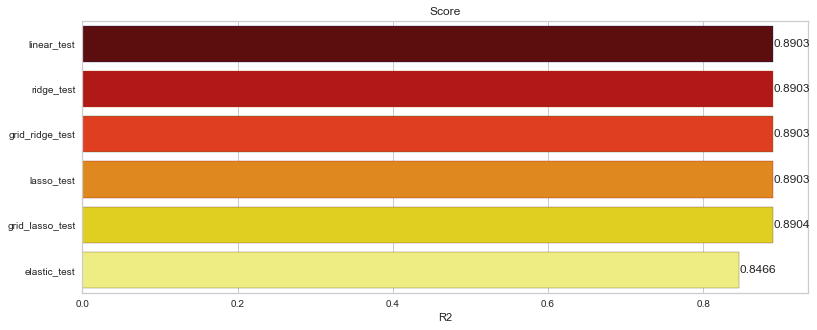

In [327]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(x=df_finals['R2'], y=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.4f}'.format(width),             
                ha = 'left',                         
                va = 'center')

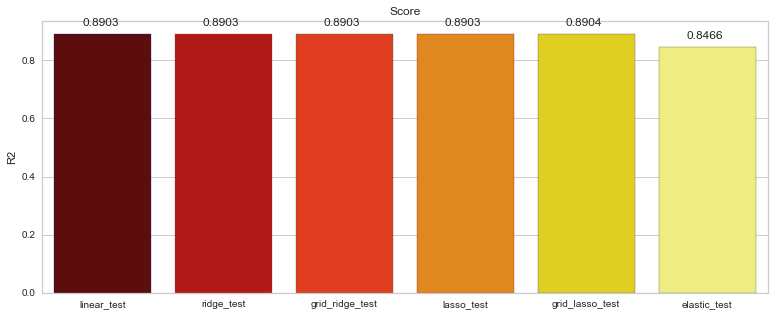

In [354]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(y=df_finals['R2'], x=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() +.23, p.get_height() * 1.03,
                '{:1.4f}'.format(height),
                )

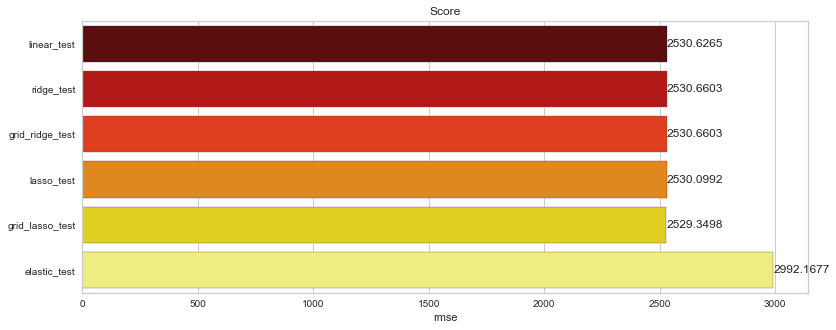

In [328]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(x=df_finals['rmse'], y=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                               
                p.get_y() + p.get_height() / 2,      
                '{:1.4f}'.format(width),             
                ha = 'left',                         
                va = 'center')

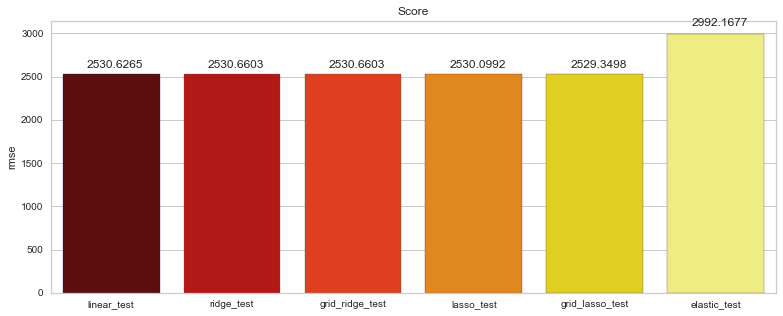

In [358]:
plt.subplots(figsize=(13,5))
ax=sns.barplot(y=df_finals['rmse'], x=df_finals.index, palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks()
plt.title('Score')
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + .2, p.get_height() * 1.03,
                '{:1.4f}'.format(height),
                )

### Finaly

In [329]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [330]:
final_model = Lasso(alpha=4) #grid_lasso

In [331]:
final_model.fit(X_scaled, y)

Lasso(alpha=4)

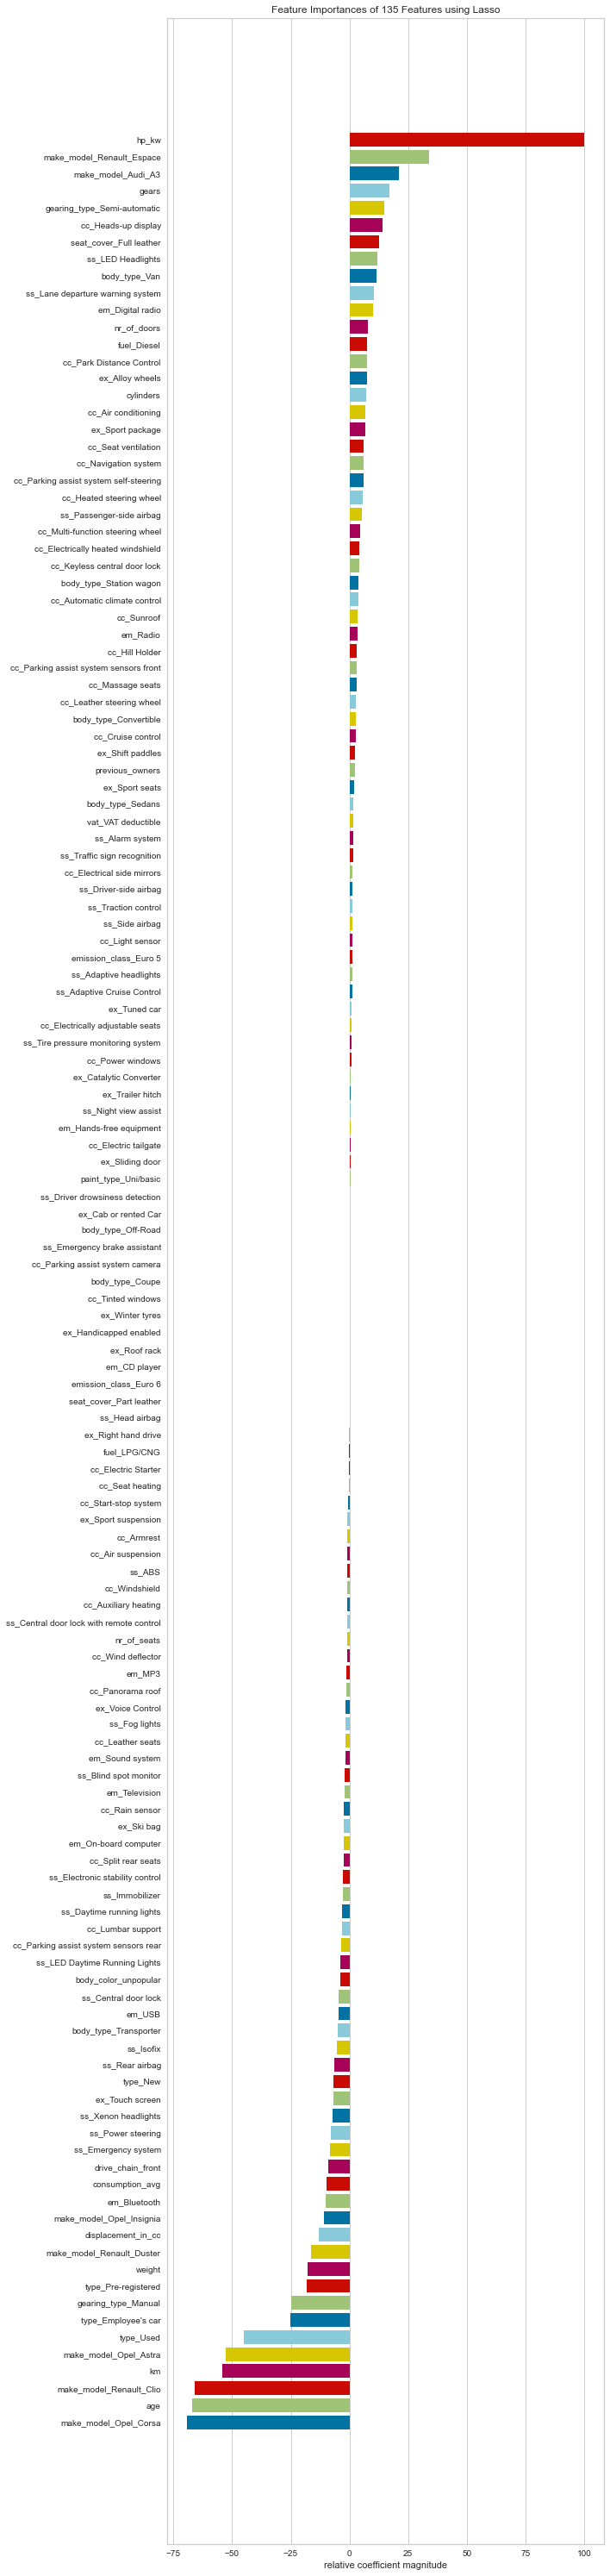

In [332]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=4)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___